In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


22:29:35 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=488784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=424155;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

22:29:37 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=177930;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=669501;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

22:29:38 INFO      Starting 3ML!                                                                     ]8;id=521762;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=407170;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=653444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=475533;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=992158;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=592534;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=687023;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=249863;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

22:29:40 WARNING   Multinest minimizer not available                                           ]8;id=681593;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=408150;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=692131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=634934;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

22:29:40 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=735370;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=615752;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=863803;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=141553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

22:29:41 WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=332926;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=512708;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

22:29:42 WARNING   No fermitools installed                                              ]8;id=283460;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=751075;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load sub from Myspeedup: 100%|██████████| 31/31 [00:00<00:00, 36.20it/s] 

Yourlib init successfully!!!


Load sub from Myspeedup: 100%|██████████| 31/31 [00:10<00:00, 77.51it/s]

22:50:55 INFO      Region of Interest:                                                                   ]8;id=673406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=790684;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=754860;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=754999;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (274.466, -15.903), model radius:     ]8;id=775266;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=375128;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#128\128]8;;\
                  8.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=743342;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=769636;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=840577;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=221450;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=862682;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=727497;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=642150;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=28560;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=194641;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=50572;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=571806;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=307483;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=793784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=353324;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=514713;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=66844;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=650849;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=68646;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsf_DRfinal                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=170554;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=69437;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=118270;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=578007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=975997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=179192;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=823688;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=704391;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=207884;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=69169;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

Bin  Nside Scheme     Obs counts     Bkg counts   obs/bkg  Pixels in ROI   
0    0   1024   RING      86.776657      87.921792  0.986976          27885  \
1    1   1024   RING    5027.065960    5070.222829  0.991488          27885   
2    2   1024   RING   54074.783721   52613.689981  1.027770          27885   
3    3   1024   RING  143042.826424  139093.744075  1.028392          27885   
4    4   1024   RING    8817.070140    8263.207362  1.067028          27885   
5    5   1024   RING    4051.512996    3398.043015  1.192308          27885   
6    6   1024   RING    5055.920624    3765.921109  1.342546          27885   
7    7   1024   RING     939.118665     489.002895  1.920477          27885   
8    8   1024   RING     265.134095     103.303125  2.566564          27885   
9    9   1024   RING      84.884012      24.961070  3.400656          27885   
10  10   1024   RING      27.401618       8.243184  3.324155          27885   
11  11   1024   RING       4.841391       2.846670  1.700721          27885   
12  12   1024   RING       3.003743       1.405820  2.136648          27885   
13  13   1024   RING       0.000000       0.579971  0.000000          27885   

    Area (deg^2)  
0      91.420716  
1      91.420716  
2      91.420716  
3      91.420716  
4      91.420716  
5      91.420716  
6      91.420716  
7      91.420716  
8      91.420716  
9      91.420716  
10     91.420716  
11     91.420716  
12     91.420716  
13     91.420716

         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=915812;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=419602;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.25 Mb                                                         ]8;id=485552;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=124694;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=427982;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=895874;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=735446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=157815;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=423910;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=539505;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=585432;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=164278;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

J1809M1918u in data_radius: 6.0
J1813M1245 in data_radius: 6.0
J1814M1719u in data_radius: 6.0
J1814M1636u in data_radius: 6.0
J1825M1418 in data_radius: 6.0
J1825M1256u in data_radius: 6.0
J1825M1337u in data_radius: 6.0
J1831M1007u in model_radius: 8.0 have been fixed!!
J1831M1028 in model_radius: 8.0 have been fixed!!


Model summary:
==============

                  N
Point sources     5
Extended sources  5
Particle sources  0

Free parameters (16):
--------------------

                                          value min_value max_value   
J1809M1918u.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1809M1918u.spectrum.main.Powerlaw.index  -3.51     -4.03     -2.99   
J1813M1245.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1813M1245.spectrum.main.Powerlaw.index   -3.66     -4.34     -2.98   
J1814M1719u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1814M1719u.spectrum.main.Powerlaw.index  -3.49     -4.11     -2.87   
J1814M1636u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1814M1636u.spectrum.main.Powerlaw.index  -3.74     -4.14     -3.34   
J1825M1418.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1825M1418.spectrum.main.Powerlaw.index   -3.53     -3.89     -3.17   
J1825M1256u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1825M1256u.spectrum.main.Powerlaw.index  -3.33     -3.59     -3.07   
J1825M1337u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1825M1337u.spectrum.main.Powerlaw.index  -3.28     -3.46      -3.1   
Diffuse.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index     -2.733      -4.0      -1.0   

                                                    unit  
J1809M1918u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1809M1918u.spectrum.main.Powerlaw.index                  
J1813M1245.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1813M1245.spectrum.main.Powerlaw.index                   
J1814M1719u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1814M1719u.spectrum.main.Powerlaw.index                  
J1814M1636u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1814M1636u.spectrum.main.Powerlaw.index                  
J1825M1418.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1825M1418.spectrum.main.Powerlaw.index                   
J1825M1256u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1825M1256u.spectrum.main.Powerlaw.index                  
J1825M1337u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1825M1337u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (39):
---------------------

                                                                                      value   
J1809M1918u.position.ra                                                              272.38  \
J1809M1918u.position.dec                                                              -19.3   
J1809M1918u.spectrum.main.Powerlaw.piv                                        50000000000.0   
J1813M1245.position.ra                                                               273.36   
J1813M1245.position.dec                                                              -12.75   
J1813M1245.spectrum.main.Powerlaw.piv                                         50000000000.0   
J1814M1719u.position.ra                                                              273.27   
J1814M1719u.position.dec                                                             -17.89   
J1814M1719u.spectrum.main.Powerlaw.piv                                        50000000000.0   
J1814M1636u.Gaussian_on_sphere.lon0                                                  273.72   
J1814M1636u.Gaussian_on_sphere.lat0                                                  -16.62   
J1814M1636u.Gaussian_on_sphere.sigma                                                   0.68   
J1814M1636u.spectrum.main.Powerlaw.piv                                        50000000000.0   
J1825M1418.Gaussian_on_sphere.lon0                                                   276.25   
J1825M1418.Gaussian_on_sphere.lat0                                                    -14.0   
J1825M1418.Gaussian_on_sphere.sigma                               

The kernel is too large with respect to the model image. Enlarge your model radius.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.000000; expected 1.0+-0.01.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.960938; expected 1.0+-0.01.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.959225; expected 1.0+-0.01.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.950919; expected 1.0+-0.01.


22:51:01 INFO      Considering 6 dec bins for extended source J1814M1636u           ]8;id=667949;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=37719;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -16.620                      ]8;id=381430;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=572829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 7 dec bins for extended source J1825M1418            ]8;id=865449;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=486325;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -14.000                      ]8;id=793736;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=918730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source J1831M1007u          ]8;id=285415;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=341402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -9.830                       ]8;id=517932;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=421865;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source J1831M1028           ]8;id=871120;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=180183;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -10.480                      ]8;id=549418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=459334;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=28361;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=283657;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -16.627                      ]8;id=716690;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=691028;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=166054;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=11611;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=645522;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=6504;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                                    
J1809M1918u.spectrum.main.Powerlaw.K              (8.2 -1.0 +1.2) x 10^-25  \
J1809M1918u.spectrum.main.Powerlaw.index                    -3.60 +/- 0.20   
J1813M1245.spectrum.main.Powerlaw.K               (9.7 -1.5 +1.8) x 10^-26   
J1813M1245.spectrum.main.Powerlaw.index                     -3.75 +/- 0.28   
J1814M1719u.spectrum.main.Powerlaw.K              (3.3 -0.6 +0.7) x 10^-25   
J1814M1719u.spectrum.main.Powerlaw.index                    -3.31 +/- 0.22   
J1814M1636u.spectrum.main.Powerlaw.K        (9.30000 +/- 0.00005) x 10^-25   
J1814M1636u.spectrum.main.Powerlaw.index                    -3.59 +/- 0.12   
J1825M1418.spectrum.main.Powerlaw.K                 (7.5 +/- 0.8) x 10^-25   
J1825M1418.spectrum.main.Powerlaw.index                     -3.23 +/- 0.12   
J1825M1256u.spectrum.main.Powerlaw.K        (4.24000 +/- 0.00019) x 10^-25   
J1825M1256u.spectrum.main.Powerlaw.index                    -3.32 +/- 0.09   
J1825M1337u.spectrum.main.Powerlaw.K      (8.880000 +/- 0.000013) x 10^-25   
J1825M1337u.spectrum.main.Powerlaw.index                    -3.23 +/- 0.06   
Diffuse.spectrum.main.Powerlaw.K                  (9.0 -2.2 +3.0) x 10^-25   
Diffuse.spectrum.main.Powerlaw.index                        -3.12 +/- 0.22   

                                                     unit  
parameter                                                  
J1809M1918u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1809M1918u.spectrum.main.Powerlaw.index                   
J1813M1245.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1813M1245.spectrum.main.Powerlaw.index                    
J1814M1719u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1814M1719u.spectrum.main.Powerlaw.index                   
J1814M1636u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1814M1636u.spectrum.main.Powerlaw.index                   
J1825M1418.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1825M1418.spectrum.main.Powerlaw.index                    
J1825M1256u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1825M1256u.spectrum.main.Powerlaw.index                   
J1825M1337u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1825M1337u.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.54  0.01  0.00  0.00  0.00 ...  0.00  0.00  0.00 -0.00 -0.09  0.04
-0.54  1.00 -0.00  0.00  0.01 -0.00 ... -0.00  0.00 -0.00 -0.00  0.02 -0.03
 0.01 -0.00  1.00 -0.08  0.02 -0.01 ...  0.00  0.00  0.00 -0.00 -0.11  0.04
 0.00  0.00 -0.08  1.00  0.00  0.00 ... -0.00  0.00  0.00 -0.00  0.01 -0.06
 0.00  0.01  0.02  0.00  1.00 -0.65 ...  0.00  0.00  0.00 -0.00 -0.15  0.06
 0.00 -0.00 -0.01  0.00 -0.65  1.00 ... -0.00  0.00 -0.00  0.00  0.05 -0.05
-0.00  0.00 -0.00 -0.00  0.00 -0.00 ... -0.00 -0.00 -0.00  0.00  0.00 -0.00
 0.02  0.00  0.02  0.01  0.02 -0.04 ...  0.00  0.01  0.00 -0.01 -0.11 -0.11
 0.04 -0.01  0.05 -0.00  0.07 -0.02 ... -0.00  0.02  0.00 -0.02 -0.47  0.23
-0.01  0.01 -0.01  0.02 -0.01  0.01 ...  0.00 -0.08 -0.00 -0.17  0.12 -0.26
 0.00 -0.00  0.00 -0.00  0.00 -0.00 ...  1.00 -0.00  0.00  0.00 -0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00 ... -0.00  1.00 -0.00 -0.07  0.00 -0.04
 0.00 -0.00  0.00  0.00  0.00 -0.00 ...  0.00 -0.00  1.00  0.00 -0.00  0.00
-0.00 -0.00 -0.00 -0.00 -0.00  0.00 ...  0.00 -0.07  0.00  1.00  0.02  0.00
-0.09  0.02 -0.11  0.01 -0.15  0.05 ... -0.00  0.00 -0.00  0.02  1.00 -0.59
 0.04 -0.03  0.04 -0.06  0.06 -0.05 ...  0.00 -0.04  0.00  0.00 -0.59  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
KM2A        4891.754471
total       4891.754471

Values of statistical measures:

statistical measures
AIC           9815.510336
BIC           9989.507367

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

(277.0751953125, -13.401350554354877)


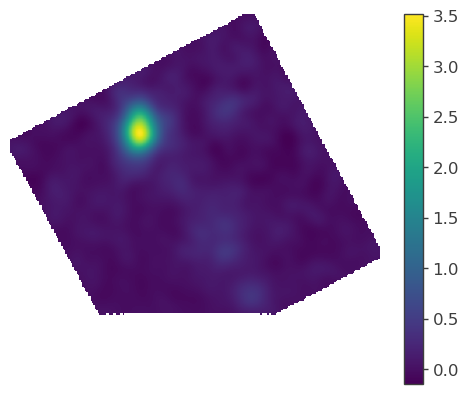

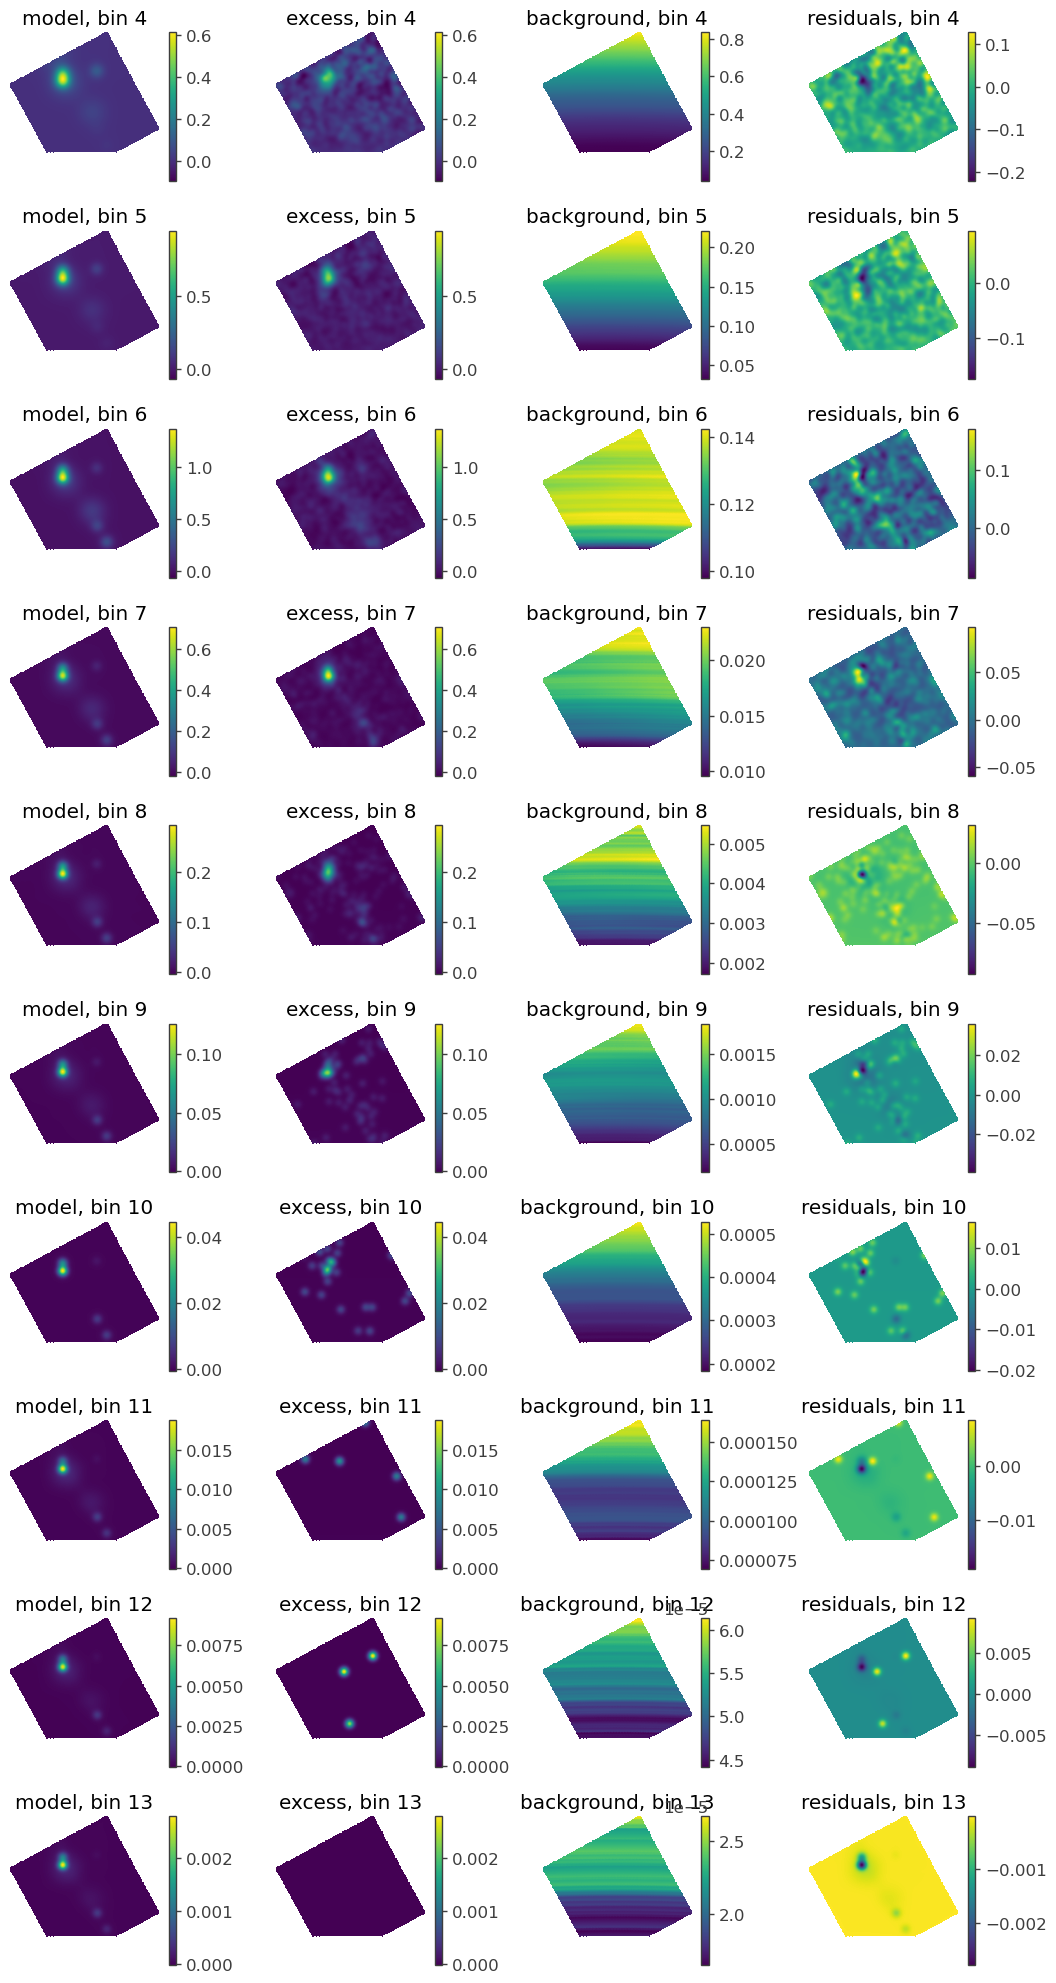

<Figure size 640x480 with 0 Axes>

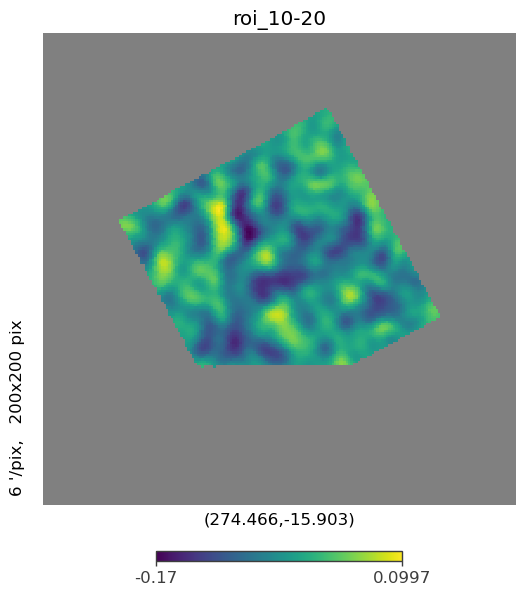

LHAASO:  1 272.66 -19.32  1LHAASO J1809-1918u   0.35
LHAASO:  2 273.35 -12.73  1LHAASO J1813-1245   0.0
LHAASO:  3 273.69 -17.33 1LHAASO J1814-1719u*    2HWC J1814-173        (0.16) 0.71
LHAASO:  4 273.72 -16.62  1KM2A J1814-1636u    2HWC J1814-173        (0.72) 0
LHAASO:  5 276.29 -14.32 1LHAASO J1825-1418    HESS J1825-137        (0.56) 0.81
LHAASO:  6 276.55 -13.04  1LHAASO J1825-1256u   0.24
LHAASO:  7 276.55 -13.73  1LHAASO J1825-1337u   0.17
LHAASO:  8 277.75 -10.12 1LHAASO J1831-1007u*    HESS J1831-098        (0.25) 0.78
LHAASO:  9 277.84 -10.48  1KM2A J1831-1028    HESS J1833-105        (0.55) 0
TeVCat:  1 271.12999999999994 -21.7 HESS J1804-216 0.16
TeVCat:  2 272.15541666666667 -20.426750000000002 HESS J1808-204 0.095
TeVCat:  3 272.62916666666666 -19.3 HESS J1809-193 0.53
TeVCat:  4 273.34024999999997 -12.687111111111111 HESS J1813-126 0.21
TeVCat:  5 273.4 -17.84 HESS J1813-178 0.037
TeVCat:  6 273.52 -17.310000000000002 2HWC J1814-173 0.0
TeVCat:  7 274.52 -15.46694444444

22:57:43 INFO      Region of Interest:                                                                   ]8;id=316750;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=931052;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=718770;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=172482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (279.224, -7.055), model radius:      ]8;id=247466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=947073;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#128\128]8;;\
                  8.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=987860;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=373068;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=592291;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=401216;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=541944;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=614628;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=239586;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=964835;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=531035;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=201142;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=350520;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=114984;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=699833;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=893175;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=170685;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=131495;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=521168;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=4437;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsf_DRfinal                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=243475;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=6157;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=639538;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=91608;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=374392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=287309;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=4639;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=878790;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=373028;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=606192;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

Bin  Nside Scheme     Obs counts     Bkg counts   obs/bkg  Pixels in ROI   
0    0   1024   RING   11571.503689   11503.923626  1.005875          30462  \
1    1   1024   RING  191981.106887  189377.749256  1.013747          30462   
2    2   1024   RING  637261.186089  622571.638600  1.023595          30462   
3    3   1024   RING  518589.083926  500655.623511  1.035820          30462   
4    4   1024   RING   35000.631882   31087.129990  1.125888          30462   
5    5   1024   RING    9878.585323    7364.027541  1.341465          30462   
6    6   1024   RING    5901.243254    4252.328424  1.387768          30462   
7    7   1024   RING    1233.545166     712.889739  1.730345          30462   
8    8   1024   RING     367.098128     174.855828  2.099433          30462   
9    9   1024   RING     126.162479      59.521223  2.119622          30462   
10  10   1024   RING      36.130826      18.421615  1.961328          30462   
11  11   1024   RING       5.178273       5.788860  0.894524          30462   
12  12   1024   RING       9.090906       2.034676  4.467987          30462   
13  13   1024   RING       3.981707       0.897914  4.434395          30462   

    Area (deg^2)  
0      99.869387  
1      99.869387  
2      99.869387  
3      99.869387  
4      99.869387  
5      99.869387  
6      99.869387  
7      99.869387  
8      99.869387  
9      99.869387  
10     99.869387  
11     99.869387  
12     99.869387  
13     99.869387

         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=500944;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=221719;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.82 Mb                                                         ]8;id=347248;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=671475;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=654217;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=63192;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=314206;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=346375;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=215177;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=969813;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=34010;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=127997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

J1825M1418 in model_radius: 8.0 have been fixed!!
J1825M1256u in model_radius: 8.0 have been fixed!!
J1825M1337u in model_radius: 8.0 have been fixed!!
J1831M1007u in data_radius: 6.0
J1831M1028 in data_radius: 6.0
J1834M0831 in data_radius: 6.0
J1837M0654u in data_radius: 6.0
J1839M0548u in data_radius: 6.0
J1841M0519 in data_radius: 6.0
J1843M0335u in data_radius: 6.0
J1848M0153u in model_radius: 8.0 have been fixed!!
J1848M0001u in model_radius: 8.0 have been fixed!!
J1850M0004u in model_radius: 8.0 have been fixed!!


Model summary:
==============

                   N
Point sources      3
Extended sources  11
Particle sources   0

Free parameters (16):
--------------------

                                          value min_value max_value   
J1831M1007u.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1831M1007u.spectrum.main.Powerlaw.index   -3.3     -3.58     -3.02   
J1831M1028.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1831M1028.spectrum.main.Powerlaw.index   -3.53     -3.83     -3.23   
J1834M0831.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1834M0831.spectrum.main.Powerlaw.index   -3.63     -4.05     -3.21   
J1837M0654u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1837M0654u.spectrum.main.Powerlaw.index   -3.7     -3.94     -3.46   
J1839M0548u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1839M0548u.spectrum.main.Powerlaw.index  -3.24     -3.42     -3.06   
J1841M0519.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1841M0519.spectrum.main.Powerlaw.index   -3.85     -4.25     -3.45   
J1843M0335u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1843M0335u.spectrum.main.Powerlaw.index  -3.44     -3.56     -3.32   
Diffuse.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index     -2.733      -4.0      -1.0   

                                                    unit  
J1831M1007u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1831M1007u.spectrum.main.Powerlaw.index                  
J1831M1028.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1831M1028.spectrum.main.Powerlaw.index                   
J1834M0831.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1834M0831.spectrum.main.Powerlaw.index                   
J1837M0654u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1837M0654u.spectrum.main.Powerlaw.index                  
J1839M0548u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1839M0548u.spectrum.main.Powerlaw.index                  
J1841M0519.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1841M0519.spectrum.main.Powerlaw.index                   
J1843M0335u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1843M0335u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (65):
---------------------

                                                                                      value   
J1825M1418.Gaussian_on_sphere.lon0                                                   276.25  \
J1825M1418.Gaussian_on_sphere.lat0                                                    -14.0   
J1825M1418.Gaussian_on_sphere.sigma                                                    0.81   
J1825M1418.spectrum.main.Powerlaw.K                                                     0.0   
J1825M1418.spectrum.main.Powerlaw.piv                                         50000000000.0   
...                                                                                     ...   
J1850M0004u.spectrum.main.Powerlaw.index                                              -3.15   
Diffuse.SpatialTemplate_2D.K                                                            1.0   
Diffuse.SpatialTemplate_2D.hash           1071638699491801797125325388152361275092095934...   
Diffuse.SpatialTemplate_2D.ihdu                                                         0.0   
Diffuse.spectrum.main.Powerlaw.piv                                            50000000000.0   

                                         min_value max_value            unit  
J1825M1418.Gaussian_on_sphere.lon0             0.0     360.0             deg  
J1825M1418.Gaussian_on_sphere.lat0           -90.0      90.0             deg  
J1825M1418.Gaussian_on_sphere.sigma            0.0      20.0             deg  
J1825M1418.spectrum.main.Powerlaw.K            0.0    1000.0  keV-1 s-1 cm-2  
J1825M1418.spectrum.main.Powerlaw.piv         

Failed to generate proper kernel normalization: got _kernel.sum() = 0.987347; expected 1.0+-0.01.


22:57:47 INFO      Considering 19 dec bins for extended source J1825M1418           ]8;id=900408;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=751090;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -14.000                      ]8;id=980225;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=215398;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 5 dec bins for extended source J1831M1007u           ]8;id=87996;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=596269;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -9.830                       ]8;id=490369;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=919582;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 8 dec bins for extended source J1831M1028            ]8;id=413289;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=651734;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -10.480                      ]8;id=561006;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=477585;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 5 dec bins for extended source J1834M0831            ]8;id=421813;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=229826;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -8.380                       ]8;id=315466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=272266;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=60559;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=627347;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -6.860                       ]8;id=550324;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=892857;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 4 dec bins for extended source J1839M0548u           ]8;id=132087;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=348285;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -5.810                       ]8;id=125482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=327166;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=295537;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=147987;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -5.230                       ]8;id=42345;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=412292;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 4 dec bins for extended source J1843M0335u           ]8;id=332157;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=73283;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -3.600                       ]8;id=110987;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=445544;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source J1848M0153u          ]8;id=168083;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=397226;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -1.780                       ]8;id=842989;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=882118;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source J1850M0004u          ]8;id=909698;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=249807;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -0.070                       ]8;id=845129;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=970524;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=156115;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=590493;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -7.798                       ]8;id=300681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=892368;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=781787;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=938122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=817336;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=434562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                                        
J1831M1007u.spectrum.main.Powerlaw.K            (2.02000 +/- 0.00004) x 10^-25  \
J1831M1007u.spectrum.main.Powerlaw.index                        -3.17 +/- 0.12   
J1831M1028.spectrum.main.Powerlaw.K       (4.19000000 +/- 0.00000020) x 10^-25   
J1831M1028.spectrum.main.Powerlaw.index                         -3.40 +/- 0.13   
J1834M0831.spectrum.main.Powerlaw.K         (1.1300000 +/- 0.0000018) x 10^-25   
J1834M0831.spectrum.main.Powerlaw.index                         -3.47 +/- 0.19   
J1837M0654u.spectrum.main.Powerlaw.K               (2.92 -0.16 +0.17) x 10^-25   
J1837M0654u.spectrum.main.Powerlaw.index                        -3.65 +/- 0.09   
J1839M0548u.spectrum.main.Powerlaw.K               (2.75 -0.15 +0.16) x 10^-25   
J1839M0548u.spectrum.main.Powerlaw.index                        -3.18 +/- 0.08   
J1841M0519.spectrum.main.Powerlaw.K                (1.85 -0.20 +0.23) x 10^-25   
J1841M0519.spectrum.main.Powerlaw.index                         -3.72 +/- 0.18   
J1843M0335u.spectrum.main.Powerlaw.K               (5.84 -0.17 +0.18) x 10^-25   
J1843M0335u.spectrum.main.Powerlaw.index                        -3.36 +/- 0.05   
Diffuse.spectrum.main.Powerlaw.K                   (1.13 -0.10 +0.11) x 10^-24   
Diffuse.spectrum.main.Powerlaw.index                            -3.33 +/- 0.12   

                                                     unit  
parameter                                                  
J1831M1007u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1831M1007u.spectrum.main.Powerlaw.index                   
J1831M1028.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1831M1028.spectrum.main.Powerlaw.index                    
J1834M0831.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1834M0831.spectrum.main.Powerlaw.index                    
J1837M0654u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1837M0654u.spectrum.main.Powerlaw.index                   
J1839M0548u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1839M0548u.spectrum.main.Powerlaw.index                   
J1841M0519.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1841M0519.spectrum.main.Powerlaw.index                    
J1843M0335u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1843M0335u.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00  0.00  0.00 -0.00  0.00  0.00 ... -0.00 -0.00 -0.00  0.00  0.00 -0.00
 0.00  1.00 -0.00 -0.25 -0.00  0.01 ...  0.01  0.01  0.00  0.01 -0.00 -0.04
 0.00 -0.00  1.00 -0.00 -0.00  0.00 ...  0.00  0.00  0.00 -0.00 -0.00  0.00
-0.00 -0.25 -0.00  1.00 -0.00  0.02 ...  0.03  0.08  0.00  0.06 -0.01 -0.27
 0.00 -0.00 -0.00 -0.00  1.00  0.00 ... -0.00 -0.00 -0.00  0.00  0.00 -0.00
 0.00  0.01  0.00  0.02  0.00  1.00 ...  0.01  0.08 -0.02  0.06  0.04 -0.27
-0.00  0.00  0.00  0.01 -0.00  0.00 ...  0.09  0.00  0.10 -0.01 -0.30  0.04
 0.00  0.01 -0.00  0.06 -0.00  0.04 ...  0.00  0.04 -0.01  0.04  0.02 -0.20
-0.00  0.00  0.00  0.00 -0.00 -0.00 ... -0.35  0.04  0.06 -0.01 -0.05  0.01
 0.00  0.00 -0.00  0.01  0.00  0.01 ...  0.03 -0.27 -0.02  0.03  0.01 -0.05
-0.00  0.01  0.00  0.03 -0.00  0.01 ...  1.00  0.36  0.03 -0.00 -0.32 -0.02
-0.00  0.01  0.00  0.08 -0.00  0.08 ...  0.36  1.00 -0.00 -0.00 -0.01 -0.29
-0.00  0.00  0.00  0.00 -0.00 -0.02 ...  0.03 -0.00  1.00  0.15 -0.34  0.09
 0.00  0.01 -0.00  0.06  0.00  0.06 ... -0.00 -0.00  0.15  1.00  0.05 -0.21
 0.00 -0.00 -0.00 -0.01  0.00  0.04 ... -0.32 -0.01 -0.34  0.05  1.00 -0.23
-0.00 -0.04  0.00 -0.27 -0.00 -0.27 ... -0.02 -0.29  0.09 -0.21 -0.23  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
KM2A        6144.849634
total       6144.849634

Values of statistical measures:

statistical measures
AIC          12321.700544
BIC          12497.111951

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

(281.337890625, -11.681666792977936)


<Figure size 640x480 with 0 Axes>

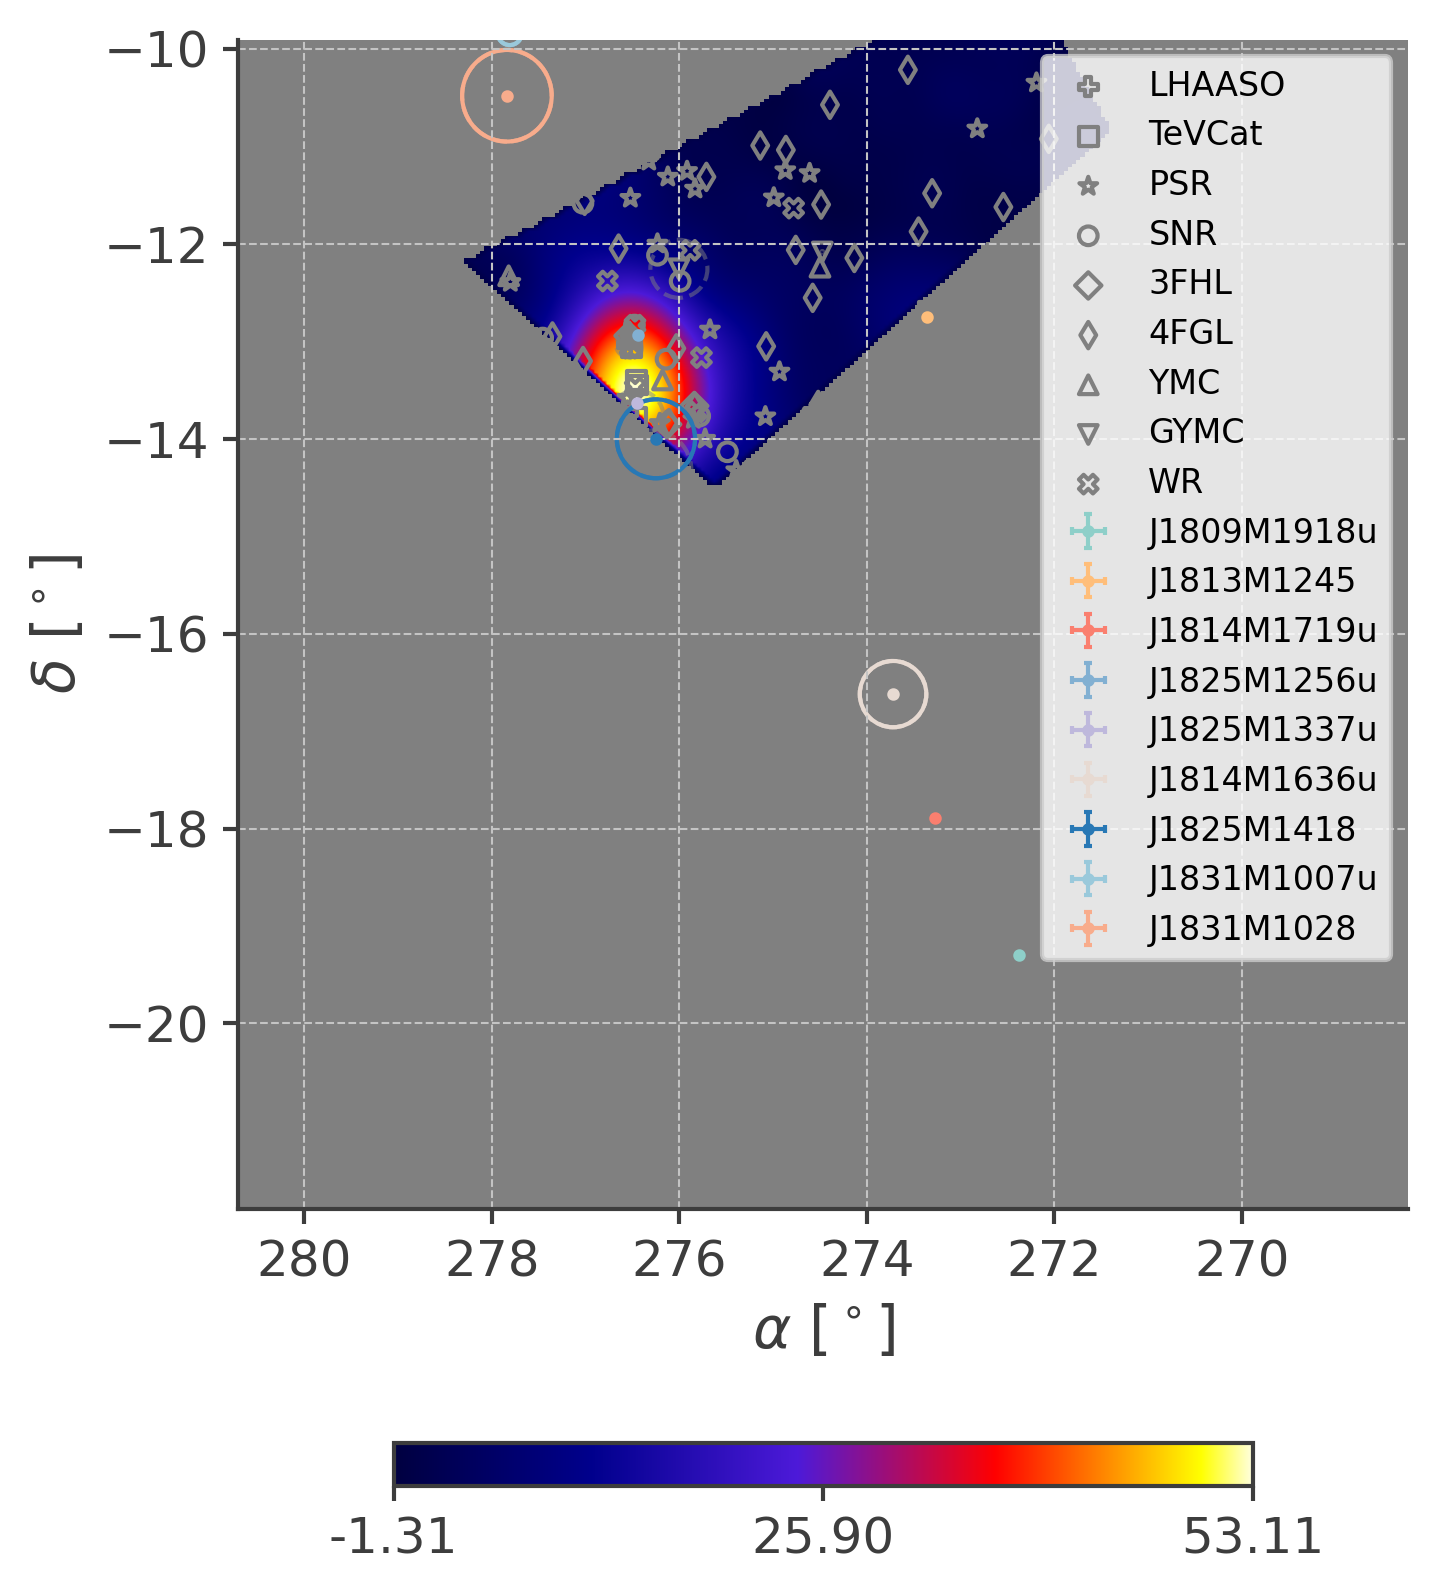

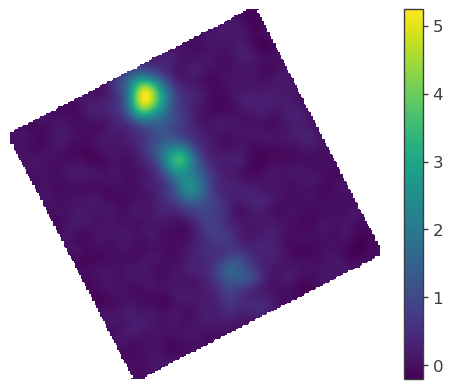

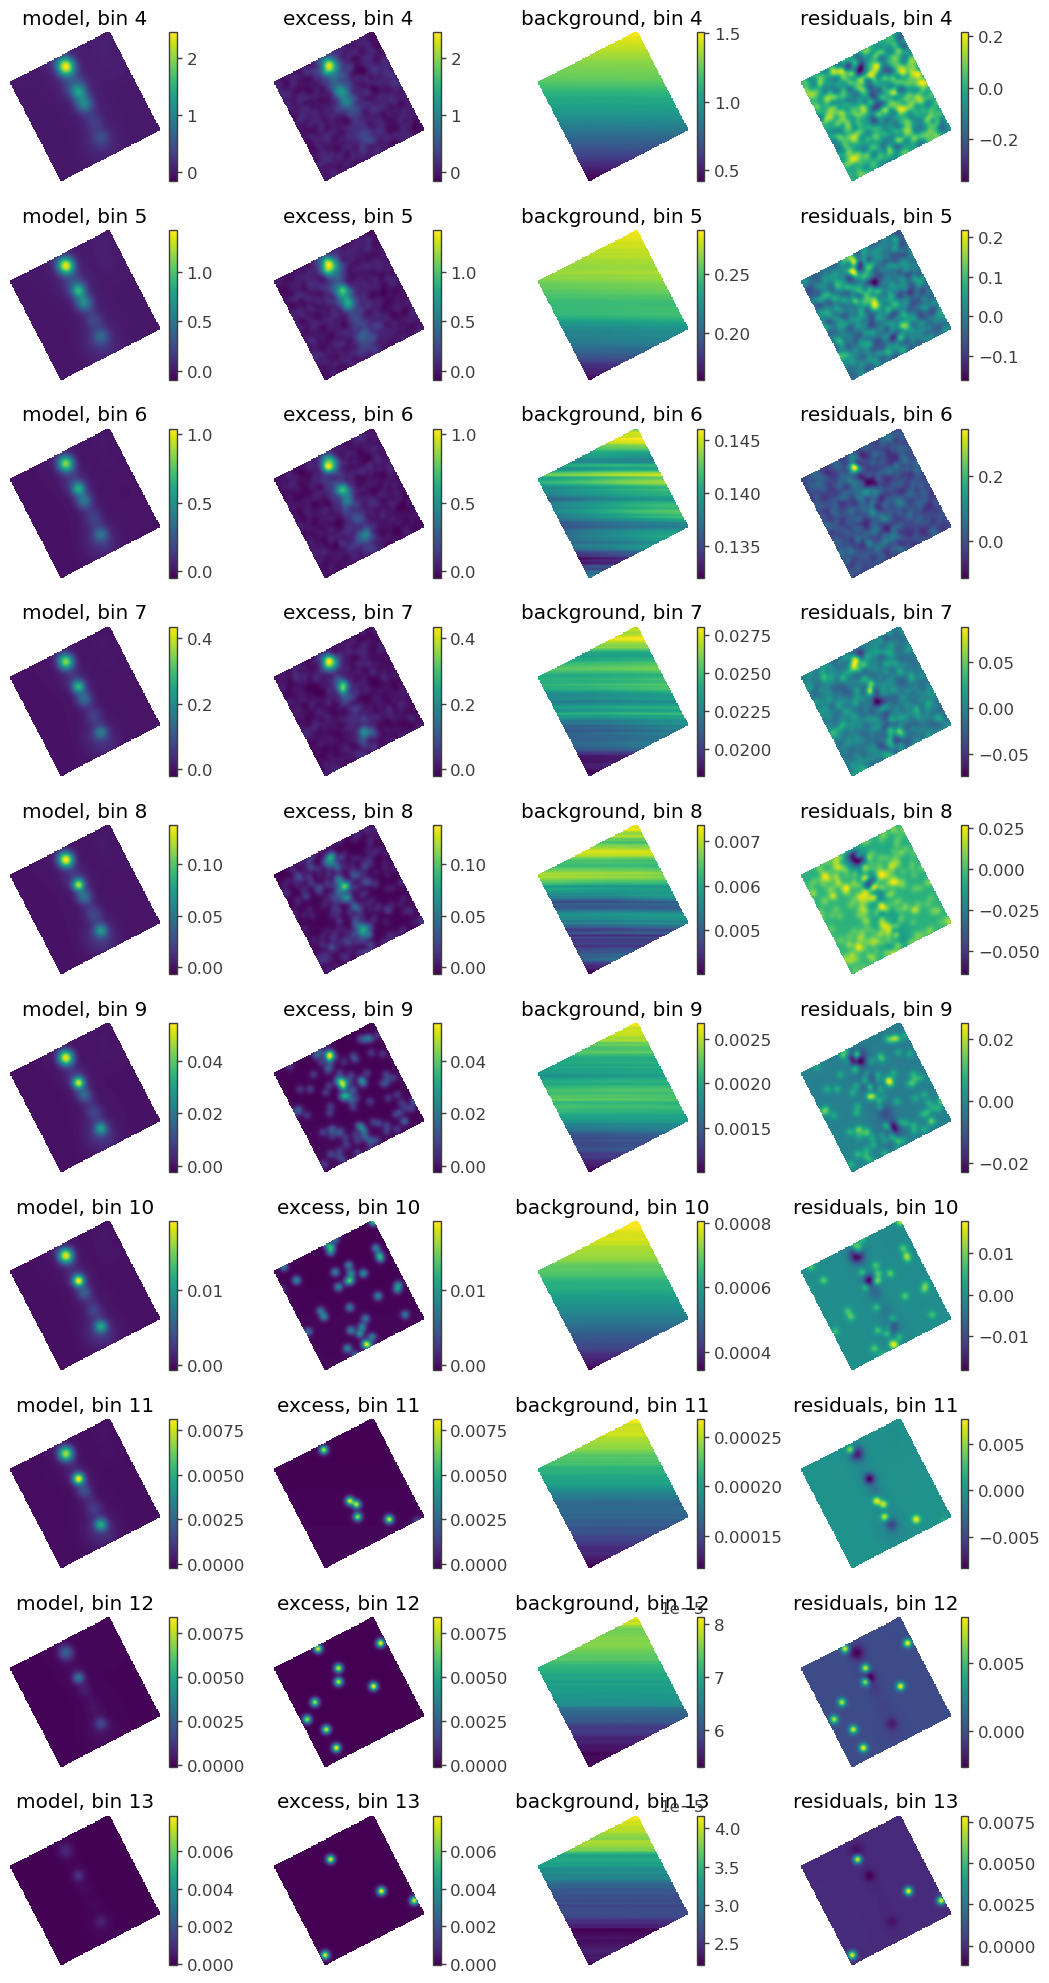

<Figure size 640x480 with 0 Axes>

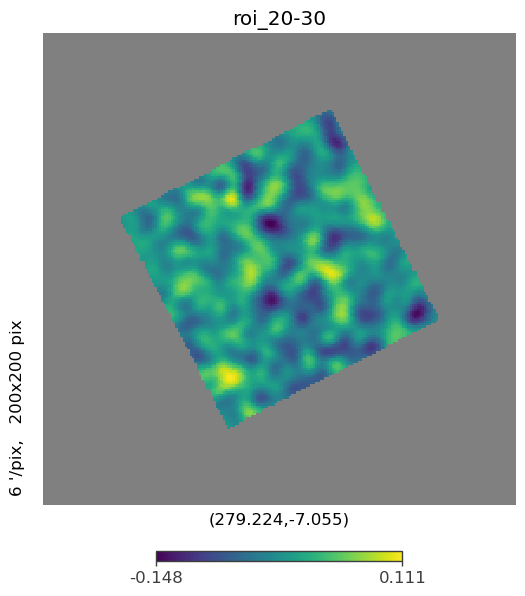

LHAASO:  1 273.35 -12.73  1LHAASO J1813-1245   0.0
LHAASO:  2 276.55 -13.04  1LHAASO J1825-1256u   0.24
LHAASO:  3 277.75 -10.12 1LHAASO J1831-1007u*    HESS J1831-098        (0.25) 0.78
LHAASO:  4 277.84 -10.48  1KM2A J1831-1028    HESS J1833-105        (0.55) 0
LHAASO:  5 278.62 -8.53 1LHAASO J1834-0831    HESS J1834-087        (0.24) 0.4
LHAASO:  6 279.39 -6.9 1LHAASO J1837-0654u    HESS J1837-069        (0.05) 0.34
LHAASO:  7 279.85 -5.9  1LHAASO J1839-0548u     0.22
LHAASO:  8 280.33 -5.33 1LHAASO J1841-0519    HESS J1841-055        (0.25) 0.6
LHAASO:  9 281.01 -3.5  1LHAASO J1843-0335u     0.4
LHAASO:  10 282.06 -1.89 1LHAASO J1848-0153u    HESS J1848-018        (0.11) 0.51
TeVCat:  1 273.34024999999997 -12.687111111111111 HESS J1813-126 0.21
TeVCat:  2 277.2446666666666 -9.992722222222222 HESS J1828-099 0.0
TeVCat:  3 277.8541666666666 -9.9 HESS J1831-098 0.15
TeVCat:  4 278.125 -8.511388888888888 HESS J1832-085 0.0
TeVCat:  5 278.2083333333333 -9.376666666666667 HESS J1832-093 

23:16:11 INFO      Region of Interest:                                                                   ]8;id=567929;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=99664;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=466811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=957426;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (283.803, 1.840), model radius: 8.000 ]8;id=185432;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=941089;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#128\128]8;;\
                  deg, display radius: 6.000 deg, threshold = 0.50                                                 

         INFO                                                                                            ]8;id=415379;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=153138;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=2634;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=69232;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=14886;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=145884;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=447818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=791720;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=253948;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=737743;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=629793;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=110627;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=188444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=60277;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=90258;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=909301;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=436455;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=743877;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsf_DRfinal                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=657389;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=508550;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=333728;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=263969;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=713313;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=597877;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=984796;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=970228;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=544767;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=819482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0    0   1024   RING  1.961588e+05  1.950619e+05  1.005623          30468  \
1    1   1024   RING  1.284082e+06  1.268299e+06  1.012444          30468   
2    2   1024   RING  1.650184e+06  1.617126e+06  1.020442          30468   
3    3   1024   RING  6.716988e+05  6.499699e+05  1.033431          30468   
4    4   1024   RING  5.528613e+04  4.798877e+04  1.152064          30468   
5    5   1024   RING  1.225695e+04  8.689102e+03  1.410612          30468   
6    6   1024   RING  6.491896e+03  4.449079e+03  1.459155          30468   
7    7   1024   RING  1.617117e+03  8.532094e+02  1.895334          30468   
8    8   1024   RING  5.054361e+02  2.292361e+02  2.204871          30468   
9    9   1024   RING  2.033491e+02  8.352693e+01  2.434533          30468   
10  10   1024   RING  6.254178e+01  2.587414e+01  2.417154          30468   
11  11   1024   RING  2.122628e+01  9.095029e+00  2.333833          30468   
12  12   1024   RING  5.023828e+00  2.688102e+00  1.868913          30468   
13  13   1024   RING  9.713689e-01  1.376514e+00  0.705673          30468   

    Area (deg^2)  
0      99.889058  
1      99.889058  
2      99.889058  
3      99.889058  
4      99.889058  
5      99.889058  
6      99.889058  
7      99.889058  
8      99.889058  
9      99.889058  
10     99.889058  
11     99.889058  
12     99.889058  
13     99.889058

         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=348871;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=766948;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.82 Mb                                                         ]8;id=683956;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=688252;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=811999;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=442772;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=23457;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=144183;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=438715;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=992893;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=745412;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=648267;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

J1841M0519 in model_radius: 8.0 have been fixed!!
J1843M0335u in model_radius: 8.0 have been fixed!!
J1848M0153u in data_radius: 6.0
J1848M0001u in data_radius: 6.0
J1850M0004u in data_radius: 6.0
J1852P0050u in data_radius: 6.0
J1857P0203u in data_radius: 6.0
J1858P0330 in data_radius: 6.0
J1908P0615u in model_radius: 8.0 have been fixed!!
J1910P0516 in data_radius: 6.0
J1913P0501 in data_radius: 6.0


Model summary:
==============

                  N
Point sources     3
Extended sources  9
Particle sources  0

Free parameters (18):
--------------------

                                          value min_value max_value   
J1848M0153u.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1848M0153u.spectrum.main.Powerlaw.index  -3.69     -3.89     -3.49   
J1848M0001u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1848M0001u.spectrum.main.Powerlaw.index  -2.75     -2.89     -2.61   
J1850M0004u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1850M0004u.spectrum.main.Powerlaw.index  -3.15     -3.33     -2.97   
J1852P0050u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1852P0050u.spectrum.main.Powerlaw.index  -3.64     -3.88      -3.4   
J1857P0203u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1857P0203u.spectrum.main.Powerlaw.index  -3.31     -3.51     -3.11   
J1858P0330.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1858P0330.spectrum.main.Powerlaw.index   -3.78     -4.08     -3.48   
J1910P0516.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1910P0516.spectrum.main.Powerlaw.index   -3.15     -3.51     -2.79   
J1913P0501.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1913P0501.spectrum.main.Powerlaw.index    -3.3     -3.66     -2.94   
Diffuse.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index     -2.733      -4.0      -1.0   

                                                    unit  
J1848M0153u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1848M0153u.spectrum.main.Powerlaw.index                  
J1848M0001u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1848M0001u.spectrum.main.Powerlaw.index                  
J1850M0004u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1850M0004u.spectrum.main.Powerlaw.index                  
J1852P0050u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1852P0050u.spectrum.main.Powerlaw.index                  
J1857P0203u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1857P0203u.spectrum.main.Powerlaw.index                  
J1858P0330.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1858P0330.spectrum.main.Powerlaw.index                   
J1910P0516.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1910P0516.spectrum.main.Powerlaw.index                   
J1913P0501.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1913P0501.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (51):
---------------------

                                                                                      value   
J1841M0519.Gaussian_on_sphere.lon0                                                   280.21  \
J1841M0519.Gaussian_on_sphere.lat0                                                    -5.23   
J1841M0519.Gaussian_on_sphere.sigma                                                    0.62   
J1841M0519.spectrum.main.Powerlaw.K                                                     0.0   
J1841M0519.spectrum.main.Powerlaw.piv                                         50000000000.0   
J1841M0519.spectrum.main.Powerlaw.index                                               -3.85   
J1843M0335u.Gaussian_on_sphere.lon0                                                  280.91   
J1843M0335u.Gaussian_on_sphere.lat0                                                    -3.6   
J1843M0335u.Gaussian_on_sphere.sigma                                                   0.36   
J1843M0335u.spectrum.main.Powerlaw.K                                                    0.0   
J1843M0335u.spectrum.main.Powerlaw.piv                                        50000000000.0   
J1843M0335u.spectrum.main.Powerlaw.index                                              -3.44   
J1848M0153u.Gaussian_on_sphere.lon0                                                  282.02

23:16:14 INFO      Considering 19 dec bins for extended source J1841M0519           ]8;id=35532;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=789867;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -5.230                       ]8;id=865028;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=145122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source J1843M0335u          ]8;id=107638;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=65953;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -3.600                       ]8;id=533192;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=436822;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 5 dec bins for extended source J1848M0153u           ]8;id=361752;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=316675;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -1.780                       ]8;id=21151;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=198736;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 4 dec bins for extended source J1850M0004u           ]8;id=894970;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=930379;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -0.070                       ]8;id=561294;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=756439;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 7 dec bins for extended source J1852P0050u           ]8;id=688011;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=319228;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 0.840                        ]8;id=853901;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=681528;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=899584;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=22273;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 2.060                        ]8;id=987659;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=839855;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 6 dec bins for extended source J1858P0330            ]8;id=125573;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=764335;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 3.510                        ]8;id=355448;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=943021;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source J1908P0615u          ]8;id=396362;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=839166;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 6.260                        ]8;id=302177;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=566841;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=895761;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=336528;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 1.971                        ]8;id=708115;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=830560;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=263114;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=356113;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=363613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=40028;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                                      
J1848M0153u.spectrum.main.Powerlaw.K      (2.9500000 +/- 0.0000015) x 10^-25  \
J1848M0153u.spectrum.main.Powerlaw.index                      -3.51 +/- 0.08   
J1848M0001u.spectrum.main.Powerlaw.K        (1.440000 +/- 0.000022) x 10^-25   
J1848M0001u.spectrum.main.Powerlaw.index                      -2.71 +/- 0.06   
J1850M0004u.spectrum.main.Powerlaw.K             (1.94 -0.09 +0.10) x 10^-25   
J1850M0004u.spectrum.main.Powerlaw.index                      -3.16 +/- 0.08   
J1852P0050u.spectrum.main.Powerlaw.K          (2.78000 +/- 0.00008) x 10^-25   
J1852P0050u.spectrum.main.Powerlaw.index                      -3.45 +/- 0.09   
J1857P0203u.spectrum.main.Powerlaw.K        (1.580000 +/- 0.000011) x 10^-25   
J1857P0203u.spectrum.main.Powerlaw.index                      -3.28 +/- 0.08   
J1858P0330.spectrum.main.Powerlaw.K           (1.36000 +/- 0.00007) x 10^-25   
J1858P0330.spectrum.main.Powerlaw.index                       -3.61 +/- 0.11   
J1910P0516.spectrum.main.Powerlaw.K                 (6.3 -0.5 +0.6) x 10^-26   
J1910P0516.spectrum.main.Powerlaw.index                       -3.30 +/- 0.14   
J1913P0501.spectrum.main.Powerlaw.K             (5.7000 +/- 0.0018) x 10^-26   
J1913P0501.spectrum.main.Powerlaw.index                       -3.28 +/- 0.14   
Diffuse.spectrum.main.Powerlaw.K                    (1.39 +/- 0.05) x 10^-24   
Diffuse.spectrum.main.Powerlaw.index                          -3.25 +/- 0.06   

                                                     unit  
parameter                                                  
J1848M0153u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1848M0153u.spectrum.main.Powerlaw.index                   
J1848M0001u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1848M0001u.spectrum.main.Powerlaw.index                   
J1850M0004u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1850M0004u.spectrum.main.Powerlaw.index                   
J1852P0050u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1852P0050u.spectrum.main.Powerlaw.index                   
J1857P0203u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1857P0203u.spectrum.main.Powerlaw.index                   
J1858P0330.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1858P0330.spectrum.main.Powerlaw.index                    
J1910P0516.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1910P0516.spectrum.main.Powerlaw.index                    
J1913P0501.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1913P0501.spectrum.main.Powerlaw.index                    
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.00  0.00 -0.00 -0.00 -0.00 ... -0.00  0.00  0.00  0.00  0.00 -0.00
-0.00  1.00 -0.00  0.00 -0.00  0.00 ... -0.01  0.01  0.00  0.00  0.10 -0.27
 0.00 -0.00  1.00 -0.00 -0.00  0.00 ...  0.00 -0.00 -0.00 -0.00 -0.00  0.00
-0.00  0.00 -0.00  1.00  0.00 -0.09 ... -0.00  0.00  0.00  0.00 -0.00 -0.03
-0.00 -0.00 -0.00  0.00  1.00  0.00 ...  0.01 -0.00 -0.00 -0.00 -0.12  0.01
-0.00  0.00  0.00 -0.09  0.00  1.00 ... -0.00  0.00  0.00  0.00  0.01 -0.04
 0.00 -0.00 -0.00 -0.00 -0.00  0.00 ...  0.00 -0.00 -0.00 -0.00 -0.00  0.00
 0.00  0.06  0.00 -0.04  0.07 -0.18 ... -0.01  0.01  0.00  0.00  0.08 -0.25
-0.00 -0.00  0.00 -0.00  0.00 -0.00 ...  0.00 -0.00 -0.00 -0.00 -0.00  0.00
 0.00  0.04 -0.00  0.01 -0.01  0.02 ... -0.00  0.00  0.00  0.00  0.05 -0.13
-0.00 -0.00  0.00  0.00  0.00 -0.00 ...  0.00 -0.00 -0.00 -0.00 -0.00 -0.00
 0.00  0.08 -0.00  0.01 -0.02  0.01 ... -0.01  0.01  0.00  0.00  0.14 -0.27
-0.00 -0.01  0.00 -0.00  0.01 -0.00 ...  1.00  0.05  0.00  0.04 -0.04  0.01
 0.00  0.01 -0.00  0.00 -0.00  0.00 ...  0.05  1.00 -0.00 -0.06  0.01 -0.03
 0.00  0.00 -0.00  0.00 -0.00  0.00 ...  0.00 -0.00  1.00 -0.00  0.00 -0.00
 0.00  0.00 -0.00  0.00 -0.00  0.00 ...  0.04 -0.06 -0.00  1.00  0.00 -0.02
 0.00  0.10 -0.00 -0.00 -0.12  0.01 ... -0.04  0.01  0.00  0.00  1.00 -0.13
-0.00 -0.27  0.00 -0.03  0.01 -0.04 ...  0.01 -0.03 -0.00 -0.02 -0.13  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
KM2A        6986.763969
total       6986.763969

Values of statistical measures:

statistical measures
AIC          14009.529541
BIC          14206.870750

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

(286.87499999999994, 4.817625011356412)


<Figure size 640x480 with 0 Axes>

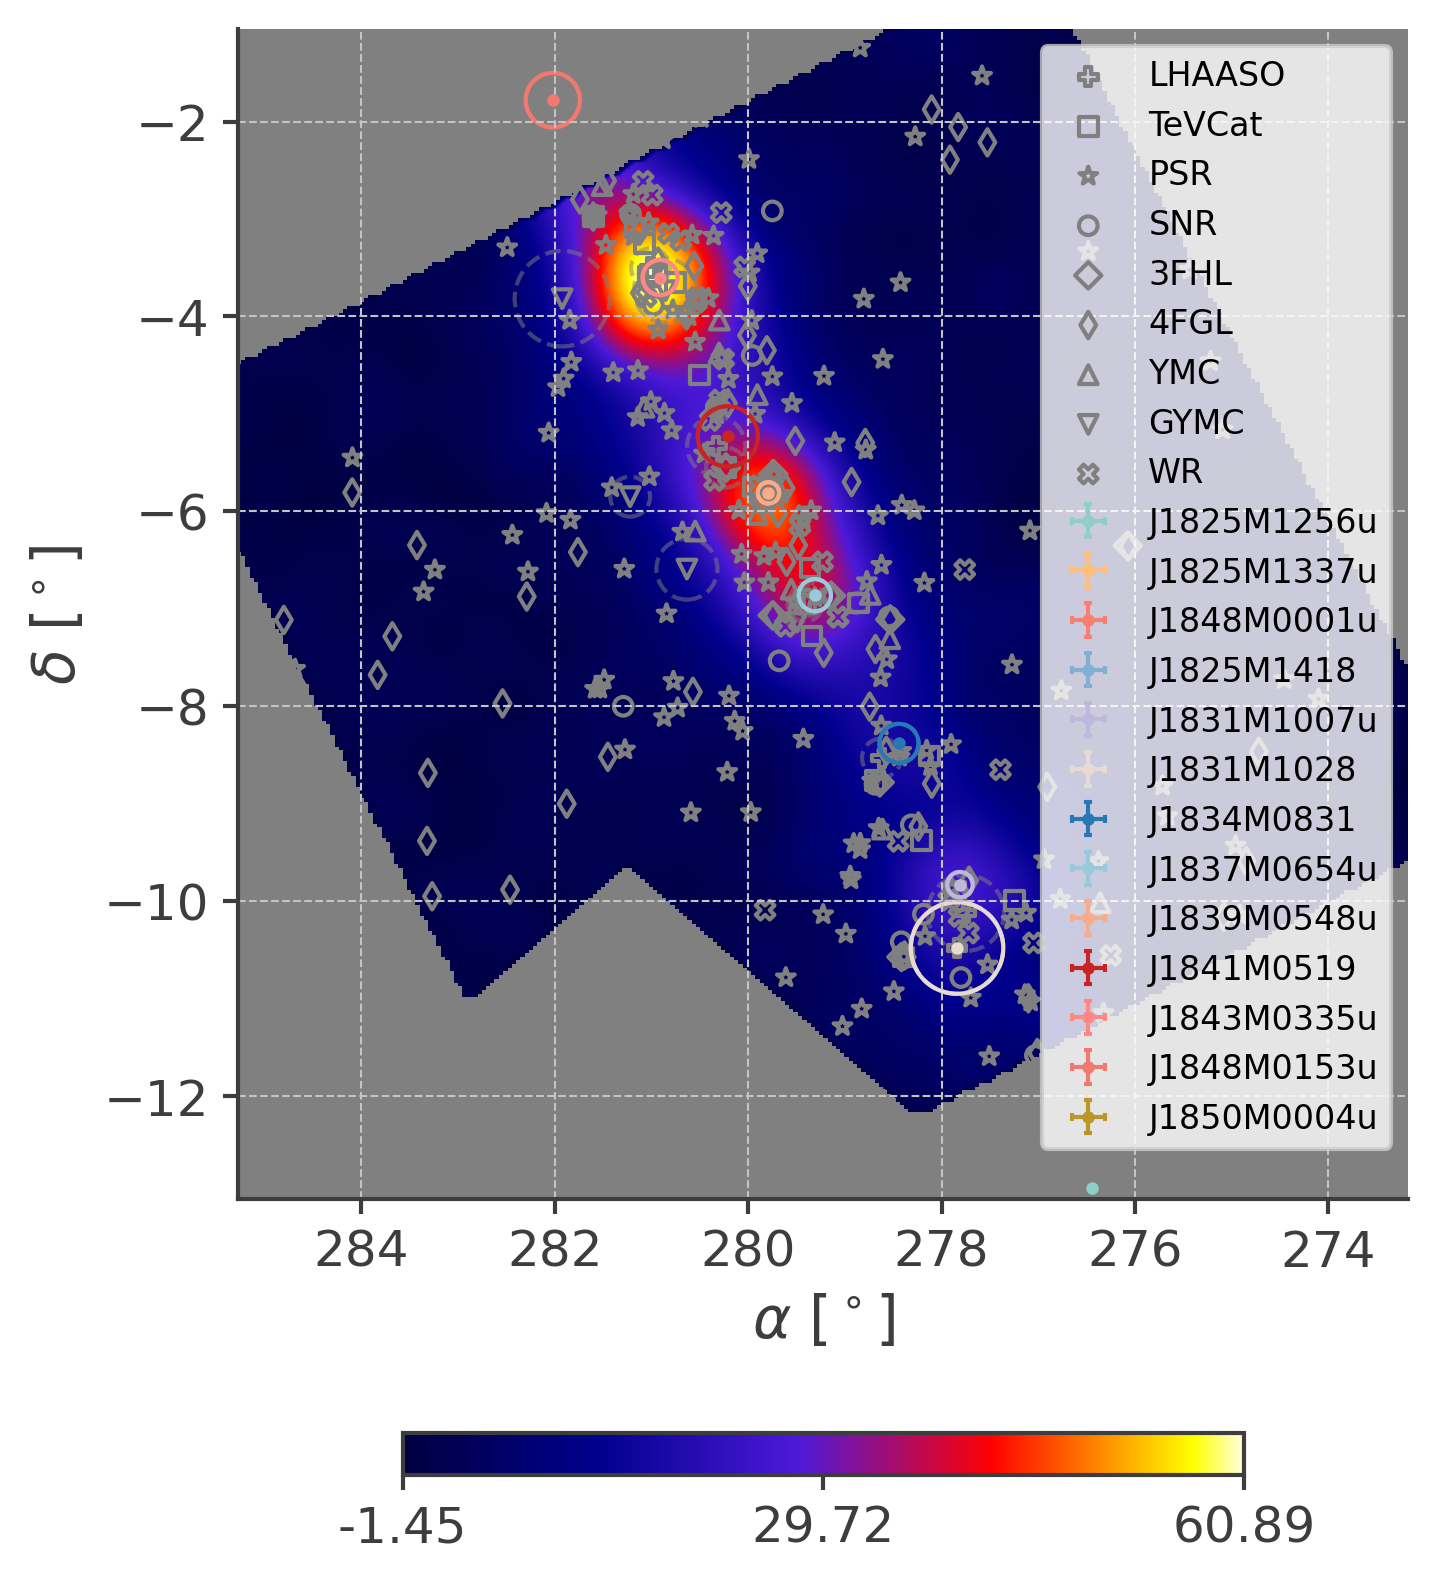

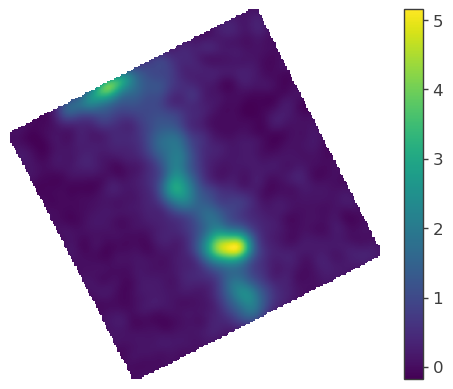

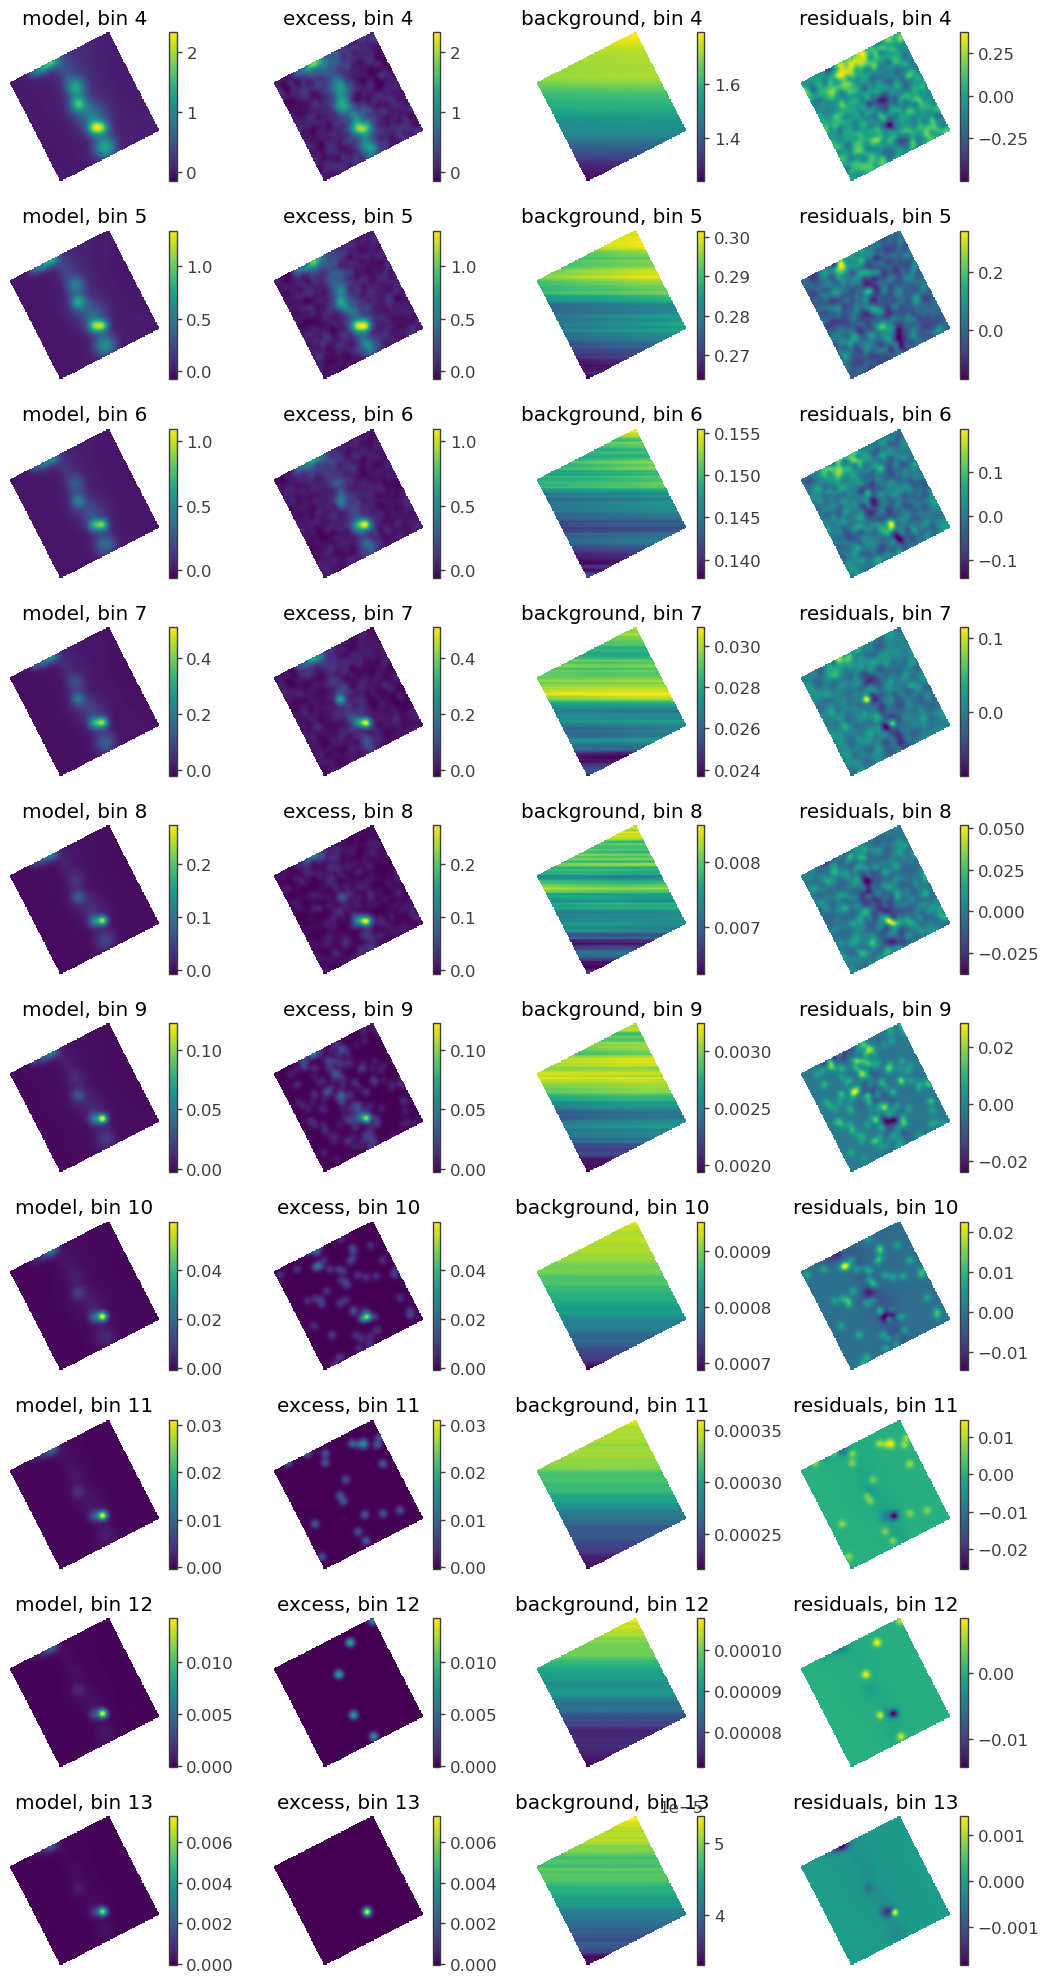

<Figure size 640x480 with 0 Axes>

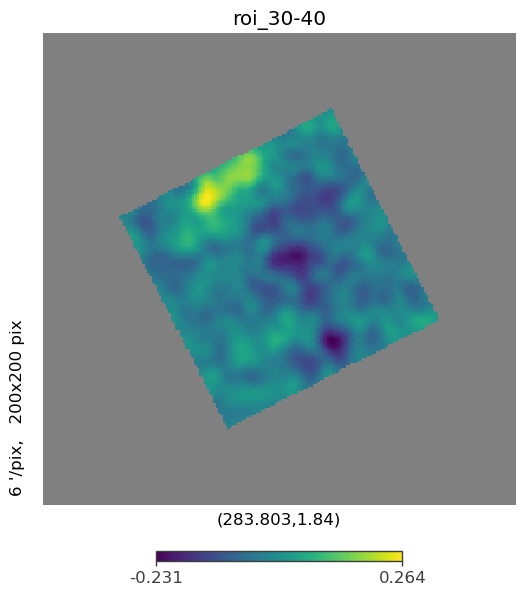

LHAASO:  1 281.01 -3.5  1LHAASO J1843-0335u     0.4
LHAASO:  2 282.06 -1.89 1LHAASO J1848-0153u    HESS J1848-018        (0.11) 0.51
LHAASO:  3 282.19 -0.02  1KM2A J1848-0001u    IGR J18490-0000       (0.08)  0
LHAASO:  4 282.74 -0.07 1LHAASO J1850-0004u*    HESS J1852-000        (0.36) 0.46
LHAASO:  5 283.73 1.4  1LHAASO J1852+0050u*     0.64
LHAASO:  6 284.37 2.75 1LHAASO J1857+0245    HESS J1857+026        (0.11) 0.24
LHAASO:  7 284.5 1.98  1LHAASO J1857+0203u     0.19
LHAASO:  8 284.79 3.7  1LHAASO J1858+0330     0.52
LHAASO:  9 285.58 6.8 1LHAASO J1902+0648  0.0
LHAASO:  10 286.56 7.2 1WCDA J1906+0712  0.21
LHAASO:  11 287.05 6.26  1LHAASO J1908+0615u     0.43
LHAASO:  12 287.88 5.07  1LHAASO J1910+0516*   0.29
LHAASO:  13 288.28 5.03  1KM2A J1913+0501    SS 433 e1             (0.15)  0
TeVCat:  1 280.74999999999994 -3.65 LHAASO J1843-0338 0.0
TeVCat:  2 280.94999999999993 -3.553888888888889 HESS J1843-033 0.0
TeVCat:  3 281.03695833333336 -3.589277777777778 0FGL J1844.1-0335 0.0


23:24:35 INFO      Region of Interest:                                                                   ]8;id=199614;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=839567;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=373277;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=311750;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (288.428, 10.724), model radius:      ]8;id=840603;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=7969;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#128\128]8;;\
                  8.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=549187;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=951387;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=965803;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=188559;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=373694;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=513134;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=360520;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=669695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=725215;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=349418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=996815;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=14629;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=921548;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=770739;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=391250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=533431;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=926609;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=161219;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsf_DRfinal                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=302573;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=387096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=648425;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=329022;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=829287;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=915064;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=609532;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=592566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=776768;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=72738;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0    0   1024   RING  9.748116e+05  9.690922e+05  1.005902          30455  \
1    1   1024   RING  3.120612e+06  3.097862e+06  1.007344          30455   
2    2   1024   RING  2.277297e+06  2.245591e+06  1.014119          30455   
3    3   1024   RING  7.122522e+05  6.936439e+05  1.026827          30455   
4    4   1024   RING  6.317302e+04  5.635425e+04  1.120998          30455   
5    5   1024   RING  1.248329e+04  9.306867e+03  1.341299          30455   
6    6   1024   RING  6.925845e+03  4.783406e+03  1.447890          30455   
7    7   1024   RING  1.798228e+03  9.508561e+02  1.891167          30455   
8    8   1024   RING  6.070386e+02  2.713204e+02  2.237350          30455   
9    9   1024   RING  2.078171e+02  9.488775e+01  2.190136          30455   
10  10   1024   RING  7.494817e+01  3.031172e+01  2.472580          30455   
11  11   1024   RING  3.160672e+01  1.113604e+01  2.838236          30455   
12  12   1024   RING  1.409231e+01  3.469523e+00  4.061743          30455   
13  13   1024   RING  4.754722e+00  1.720515e+00  2.763546          30455   

    Area (deg^2)  
0      99.846437  
1      99.846437  
2      99.846437  
3      99.846437  
4      99.846437  
5      99.846437  
6      99.846437  
7      99.846437  
8      99.846437  
9      99.846437  
10     99.846437  
11     99.846437  
12     99.846437  
13     99.846437

         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=601369;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=120614;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.82 Mb                                                         ]8;id=632820;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=366452;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=648600;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=629068;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=108093;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=901544;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=48123;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=388135;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=994302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=501362;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

J1908P0615u in data_radius: 6.0
J1910P0516 in model_radius: 8.0 have been fixed!!
J1912P1014u in data_radius: 6.0
J1913P0501 in model_radius: 8.0 have been fixed!!
J1914P1150u in data_radius: 6.0
J1919P1556 in model_radius: 8.0 have been fixed!!
J1922P1403 in data_radius: 6.0
J1924P1609 in model_radius: 8.0 have been fixed!!
J1931P1653 in model_radius: 8.0 have been fixed!!


Model summary:
==============

                  N
Point sources     5
Extended sources  5
Particle sources  0

Free parameters (10):
--------------------

                                          value min_value max_value   
J1908P0615u.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1908P0615u.spectrum.main.Powerlaw.index  -2.82     -2.88     -2.76   
J1912P1014u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1912P1014u.spectrum.main.Powerlaw.index  -3.26     -3.48     -3.04   
J1914P1150u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1914P1150u.spectrum.main.Powerlaw.index  -3.41     -3.67     -3.15   
J1922P1403.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1922P1403.spectrum.main.Powerlaw.index   -3.79     -4.19     -3.39   
Diffuse.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index     -2.733      -4.0      -1.0   

                                                    unit  
J1908P0615u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1908P0615u.spectrum.main.Powerlaw.index                  
J1912P1014u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1912P1014u.spectrum.main.Powerlaw.index                  
J1914P1150u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1914P1150u.spectrum.main.Powerlaw.index                  
J1922P1403.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1922P1403.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (45):
---------------------

                                                                                     value   
J1908P0615u.Gaussian_on_sphere.lon0                                                 287.05  \
J1908P0615u.Gaussian_on_sphere.lat0                                                   6.26   
J1908P0615u.Gaussian_on_sphere.sigma                                                  0.36   
J1908P0615u.spectrum.main.Powerlaw.piv                                       50000000000.0   
J1910P0516.position.ra                                                              287.55   
J1910P0516.position.dec                                                               5.28   
J1910P0516.spectrum.main.Powerlaw.K                                                    0.0   
J1910P0516.spectrum.main.Powerlaw.piv                                        50000000000.0   
J1910P0516.spectrum.main.Powerlaw.index                                              -3.15   
J1912P1014u.Gaussian_on_sphere.lon0                                                 288.38   
J1912P1014u.Gaussian_on_sphere.lat0                                                   10.5   
J1912P1014u.Gaussian_on_sphere.sigma                                                   0.5   
J1912P1014u.spectrum.main.Powerlaw.piv                                       50000000000.0   
J1913P0501.position.ra                                                              288.28   
J1913P0501.position.dec                                                               5.03   
J1913P0501.spectrum.main.Powerlaw.K                                                    0.0   
J1913P0501.spectrum.main.Powerlaw.piv                                        50000000000.0   
J1913P0501.spectrum.main.Powerlaw.index                                               -3.3   
J1914P1150u.Gaussian_on_sphere.lon0                                                 288.73   
J1914P1150u.Gaussian_on_sphere.lat0                                                  11.84   
J1914P1150u.Gaussian_on_sphere.sigma                                                  0.21   
J1914P1150u.spectrum.main.Powerlaw.piv                                       50000000000.0   
J1919P1556.position.ra                                                              289.78   
J1919P1556.position.dec                                                              15.93   
J1919P1556.spect

Failed to generate proper kernel normalization: got _kernel.sum() = 0.969368; expected 1.0+-0.01.
The kernel is too large with respect to the model image. Enlarge your model radius.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.000000; expected 1.0+-0.01.


23:24:41 INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=882404;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=564922;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 6.260                        ]8;id=716115;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=505978;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 6 dec bins for extended source J1912P1014u           ]8;id=214578;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=667020;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 10.500                       ]8;id=682132;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=7684;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 4 dec bins for extended source J1914P1150u           ]8;id=245368;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=318088;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 11.840                       ]8;id=483255;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=531687;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source J1924P1609           ]8;id=373901;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=798193;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 15.710                       ]8;id=364544;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=463481;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=154735;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=144300;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 9.957                        ]8;id=833320;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=697302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=313148;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=470274;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=287170;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=15938;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                                    
J1908P0615u.spectrum.main.Powerlaw.K              (7.55 +/- 0.14) x 10^-25  \
J1908P0615u.spectrum.main.Powerlaw.index                  -2.851 +/- 0.027   
J1912P1014u.spectrum.main.Powerlaw.K      (1.320000 +/- 0.000005) x 10^-25   
J1912P1014u.spectrum.main.Powerlaw.index                    -3.25 +/- 0.10   
J1914P1150u.spectrum.main.Powerlaw.K        (6.70000 +/- 0.00005) x 10^-26   
J1914P1150u.spectrum.main.Powerlaw.index                    -3.20 +/- 0.11   
J1922P1403.spectrum.main.Powerlaw.K         (3.70000 +/- 0.00004) x 10^-26   
J1922P1403.spectrum.main.Powerlaw.index                     -3.51 +/- 0.15   
Diffuse.spectrum.main.Powerlaw.K                  (1.26 +/- 0.04) x 10^-24   
Diffuse.spectrum.main.Powerlaw.index                        -3.08 +/- 0.05   

                                                     unit  
parameter                                                  
J1908P0615u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1908P0615u.spectrum.main.Powerlaw.index                   
J1912P1014u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1912P1014u.spectrum.main.Powerlaw.index                   
J1914P1150u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J1914P1150u.spectrum.main.Powerlaw.index                   
J1922P1403.spectrum.main.Powerlaw.K       1 / (keV s cm2)  
J1922P1403.spectrum.main.Powerlaw.index                    
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.09  0.00 -0.01  0.00 -0.01  0.00 -0.01 -0.14  0.05
-0.09  1.00 -0.00  0.03 -0.00  0.01 -0.00  0.01  0.04 -0.10
 0.00 -0.00  1.00  0.00 -0.00  0.00  0.00 -0.00 -0.00  0.00
-0.01  0.03  0.00  1.00  0.00 -0.02 -0.00  0.02  0.08 -0.26
 0.00 -0.00 -0.00  0.00  1.00  0.00  0.00 -0.00 -0.00  0.00
-0.01  0.01  0.00 -0.02  0.00  1.00 -0.00  0.01  0.05 -0.11
 0.00 -0.00  0.00 -0.00  0.00 -0.00  1.00  0.00 -0.00  0.00
-0.01  0.01 -0.00  0.02 -0.00  0.01  0.00  1.00  0.06 -0.09
-0.14  0.04 -0.00  0.08 -0.00  0.05 -0.00  0.06  1.00 -0.23
 0.05 -0.10  0.00 -0.26  0.00 -0.11  0.00 -0.09 -0.23  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
KM2A        7291.641855
total       7291.641855

Values of statistical measures:

statistical measures
AIC          14603.284226
BIC          14712.914338

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

(288.3251953125, 6.729812841830579)


<Figure size 640x480 with 0 Axes>

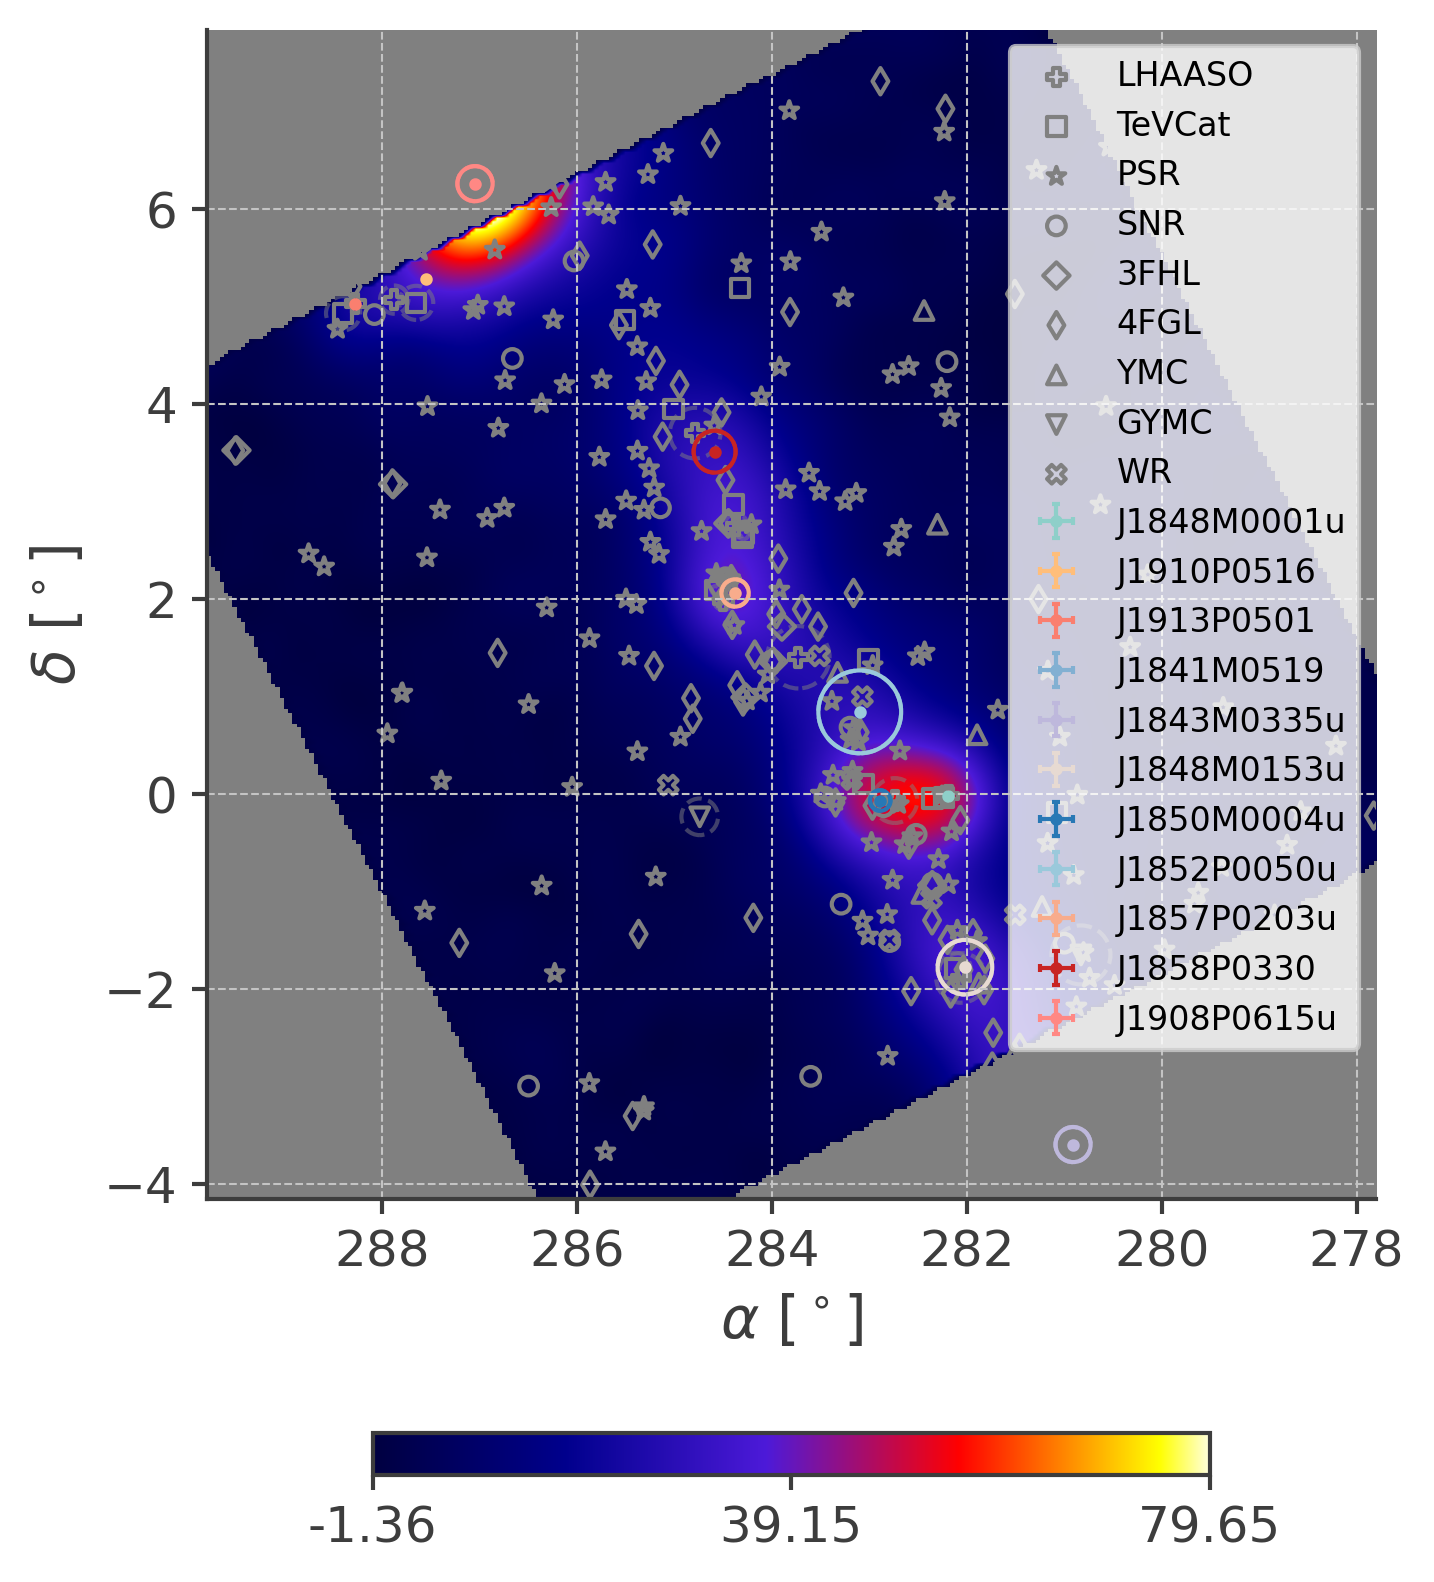

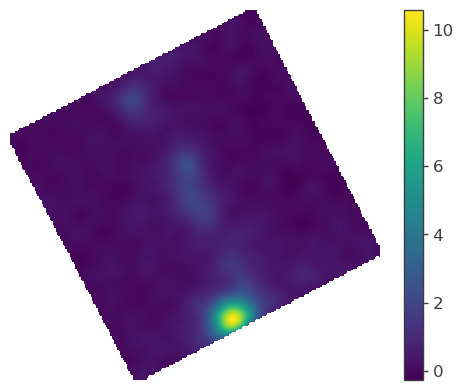

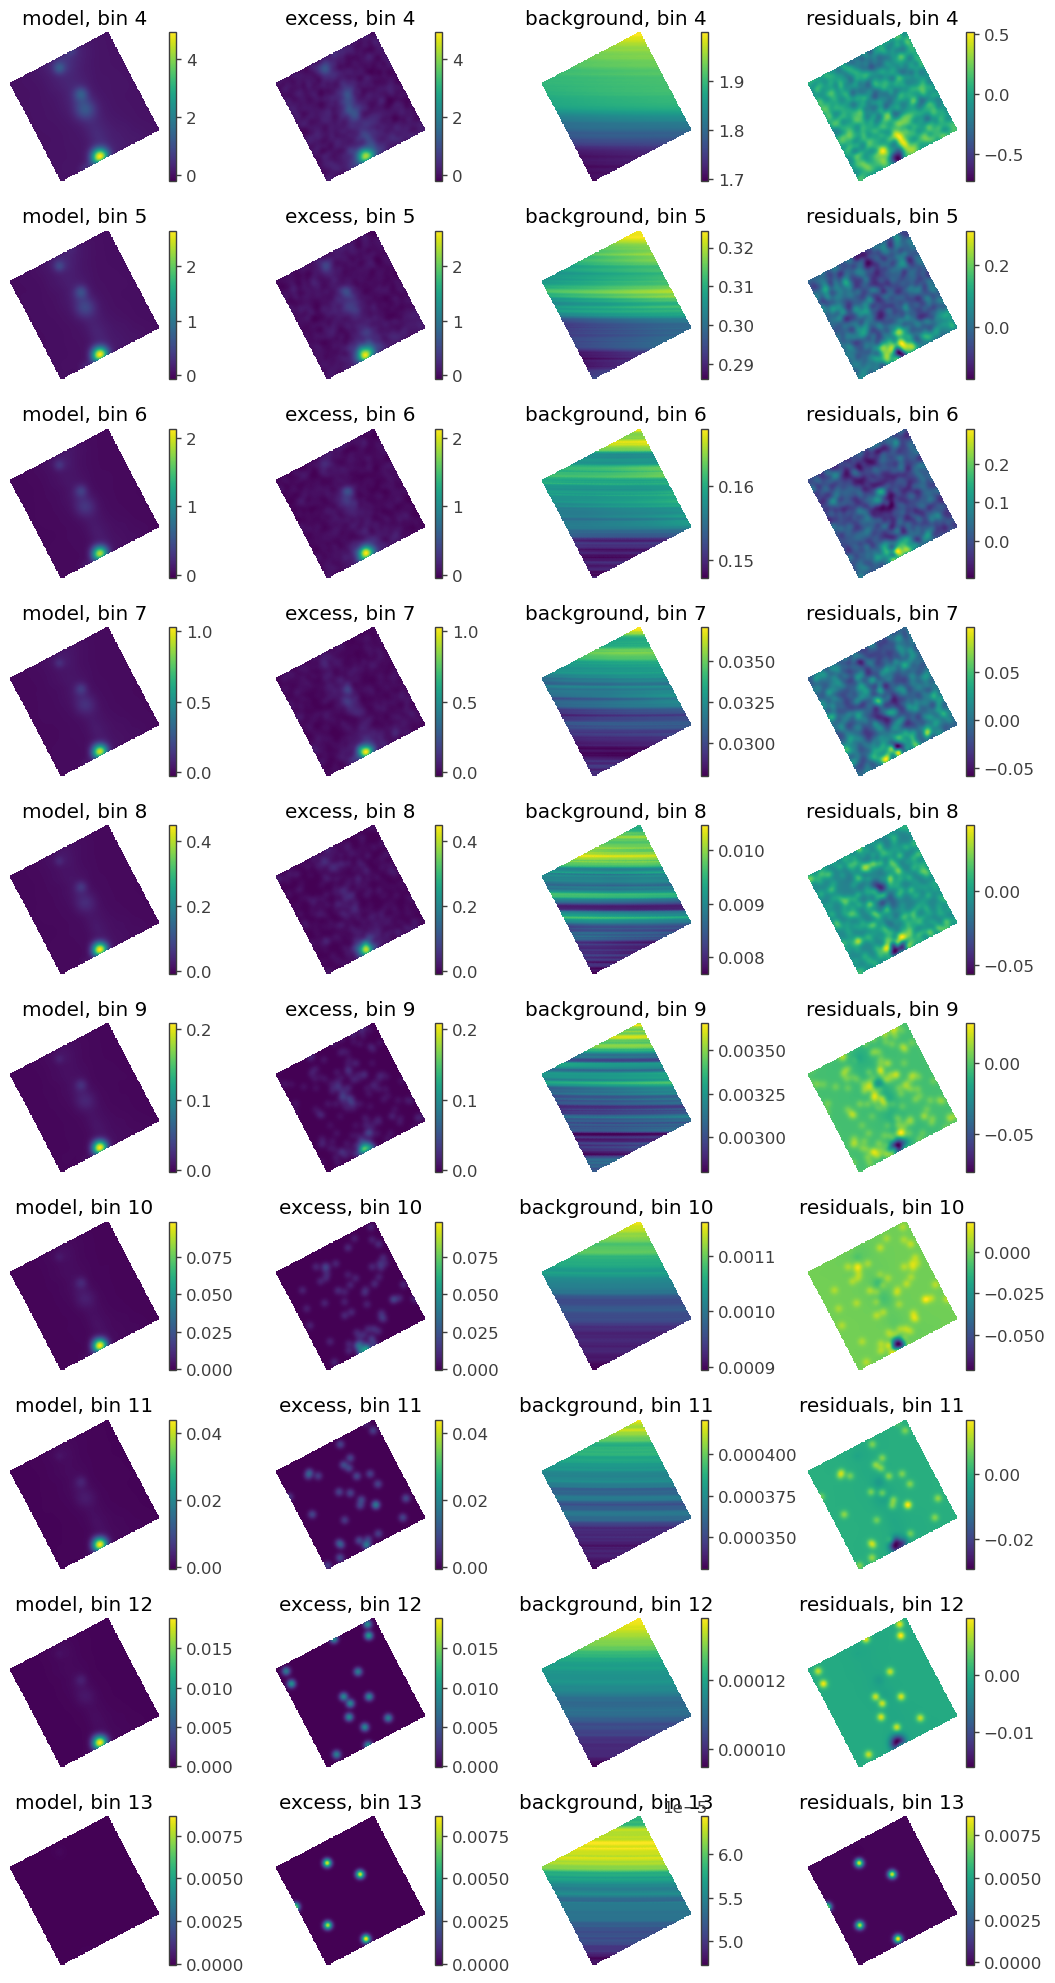

<Figure size 640x480 with 0 Axes>

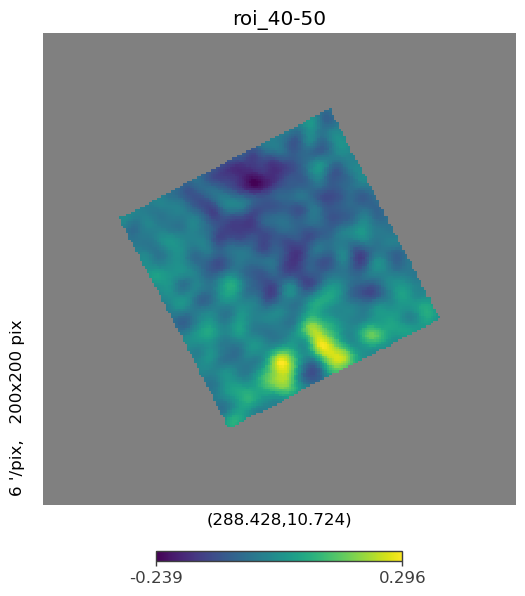

LHAASO:  1 285.58 6.8 1LHAASO J1902+0648  0.0
LHAASO:  2 286.56 7.2 1WCDA J1906+0712  0.21
LHAASO:  3 286.96 8.44 1WCDA J1907+0826    2HWC J1907+084*       (0.18) 0.43
LHAASO:  4 287.05 6.26  1LHAASO J1908+0615u     0.43
LHAASO:  5 287.88 5.07  1LHAASO J1910+0516*   0.29
LHAASO:  6 288.22 10.25 1LHAASO J1912+1014u    HESS J1912+101        (0.10) 0.36
LHAASO:  7 288.28 5.03  1KM2A J1913+0501    SS 433 e1             (0.15)  0
LHAASO:  8 288.81 11.74  1LHAASO J1914+1150u     0.33
LHAASO:  9 289.78 15.93  1KM2A J1919+1556   3HWC J1918+159(0.09)  0
LHAASO:  10 290.7 14.06 1LHAASO J1922+1403    W 51                  (0.13) 0.18
LHAASO:  11 291.09 16.15 1LHAASO J1924+1609   3HWC J1923+169(0.86) 1.45
TeVCat:  1 284.3295833333333 5.189166666666667 3HWC J1857+051 0.0
TeVCat:  2 285.51 4.859999999999999 2HWC J1902+048* 0.0
TeVCat:  3 286.09999999999997 8.0 1HWC J1904+080c 0.0
TeVCat:  4 286.78999999999996 8.5 2HWC J1907+084* 0.0
TeVCat:  5 286.97499999999997 6.268611111111111 MGRO J1908+06 0.34


23:28:06 INFO      Region of Interest:                                                                   ]8;id=547278;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=208943;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=57024;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=997795;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (293.333, 19.535), model radius:      ]8;id=464225;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=595293;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#128\128]8;;\
                  8.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

23:28:07 INFO                                                                                            ]8;id=322433;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=550599;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=400638;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=375382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=693549;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=526378;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=226018;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=388773;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=116934;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=173995;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=805409;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=357467;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=518722;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=327421;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=467870;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=663611;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=957295;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=564026;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsf_DRfinal                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=147030;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=713691;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=888220;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=71139;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=245662;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=448263;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=383616;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=897168;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=785962;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=624258;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0    0   1024   RING  2.143412e+06  2.129919e+06  1.006335          30468  \
1    1   1024   RING  4.650505e+06  4.626446e+06  1.005200          30468   
2    2   1024   RING  2.620453e+06  2.601148e+06  1.007422          30468   
3    3   1024   RING  7.413956e+05  7.283579e+05  1.017900          30468   
4    4   1024   RING  6.671317e+04  6.167917e+04  1.081616          30468   
5    5   1024   RING  1.193157e+04  9.940931e+03  1.200247          30468   
6    6   1024   RING  6.360668e+03  5.139279e+03  1.237658          30468   
7    7   1024   RING  1.526743e+03  1.104519e+03  1.382271          30468   
8    8   1024   RING  5.210155e+02  3.088876e+02  1.686748          30468   
9    9   1024   RING  1.534071e+02  1.040594e+02  1.474225          30468   
10  10   1024   RING  5.099885e+01  3.646566e+01  1.398545          30468   
11  11   1024   RING  1.735304e+01  1.296730e+01  1.338215          30468   
12  12   1024   RING  1.218536e+01  4.185284e+00  2.911477          30468   
13  13   1024   RING  3.960101e+00  1.780870e+00  2.223689          30468   

    Area (deg^2)  
0      99.889058  
1      99.889058  
2      99.889058  
3      99.889058  
4      99.889058  
5      99.889058  
6      99.889058  
7      99.889058  
8      99.889058  
9      99.889058  
10     99.889058  
11     99.889058  
12     99.889058  
13     99.889058

         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=814157;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=255383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.82 Mb                                                         ]8;id=325886;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=858383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=794968;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=401059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=470419;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=22338;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=386085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=827479;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=350695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=438037;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

J1919P1556 in data_radius: 6.0
J1922P1403 in model_radius: 8.0 have been fixed!!
J1924P1609 in data_radius: 6.0
J1928P1813u in data_radius: 6.0
J1928P1746u in data_radius: 6.0
J1929P1846u in data_radius: 6.0
J1931P1653 in data_radius: 6.0
J1937P2128 in data_radius: 6.0
J1945P2424 in model_radius: 8.0 have been fixed!!
J1951P2608 in model_radius: 8.0 have been fixed!!


Model summary:
==============

                  N
Point sources     5
Extended sources  6
Particle sources  0

Free parameters (16):
--------------------

                                          value min_value max_value   
J1919P1556.spectrum.main.Powerlaw.K         0.0       0.0       0.0  \
J1919P1556.spectrum.main.Powerlaw.index   -4.71     -5.77     -3.65   
J1924P1609.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1924P1609.spectrum.main.Powerlaw.index   -3.61     -4.05     -3.17   
J1928P1813u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1928P1813u.spectrum.main.Powerlaw.index  -3.24      -3.4     -3.08   
J1928P1746u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1928P1746u.spectrum.main.Powerlaw.index   -3.1     -3.34     -2.86   
J1929P1846u.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1929P1846u.spectrum.main.Powerlaw.index  -3.11     -3.35     -2.87   
J1931P1653.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1931P1653.spectrum.main.Powerlaw.index   -3.15     -3.65     -2.65   
J1937P2128.spectrum.main.Powerlaw.K         0.0       0.0       0.0   
J1937P2128.spectrum.main.Powerlaw.index    -3.4      -3.7      -3.1   
Diffuse.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index     -2.733      -4.0      -1.0   

                                                    unit  
J1919P1556.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1919P1556.spectrum.main.Powerlaw.index                   
J1924P1609.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1924P1609.spectrum.main.Powerlaw.index                   
J1928P1813u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1928P1813u.spectrum.main.Powerlaw.index                  
J1928P1746u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1928P1746u.spectrum.main.Powerlaw.index                  
J1929P1846u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1929P1846u.spectrum.main.Powerlaw.index                  
J1931P1653.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1931P1653.spectrum.main.Powerlaw.index                   
J1937P2128.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1937P2128.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (45):
---------------------

                                                                                     value   
J1919P1556.position.ra                                                              289.78  \
J1919P1556.position.dec                                                              15.93   
J1919P1556.spectrum.main.Powerlaw.piv                                        50000000000.0   
J1922P1403.position.ra                                                              290.73   
J1922P1403.position.dec                                                              14.11   
J1922P1403.spectrum.main.Powerlaw.K                                                    0.0   
J1922P1403.spectrum.main.Powerlaw.piv                                        50000000000.0   
J1922P1403.spectrum.main.Powerlaw.index                                              -3.79   
J1924P1609.Gaussian_on_sphere.lon0                                                  290.53   
J1924P1609.Gaussian_on_sphere.lat0                                                   15.71   
J1924P1609.Gaussian_on_sphere.sigma                                                   1.22   
J1924P1609.spectrum.main.Powerlaw.piv                                        50000000000.0   
J1928P1813u.Gaussian_on_sphere.lon0                                                 292.07   
J1928P1813u.Gaussian_on_sphere.lat0                                                  18.23   
J1928P1813u.Gaussian_on_sphere.sigma                                                  0.63   
J1928P1813u.spectrum.main.Powerlaw.piv                                       50000

Failed to generate proper kernel normalization: got _kernel.sum() = 0.989294; expected 1.0+-0.01.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.984590; expected 1.0+-0.01.


23:28:10 INFO      Considering 10 dec bins for extended source J1924P1609           ]8;id=204382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=678131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 15.710                       ]8;id=367695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=834605;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 6 dec bins for extended source J1928P1813u           ]8;id=457686;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=979953;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 18.230                       ]8;id=808960;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=776053;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 10 dec bins for extended source J1937P2128           ]8;id=873525;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=318812;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 21.480                       ]8;id=917011;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=709611;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source J1945P2424           ]8;id=532264;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=719352;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 23.970                       ]8;id=84083;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=566384;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source J1951P2608           ]8;id=996671;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=836685;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 26.150                       ]8;id=780655;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=374383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=763781;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=448602;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 18.770                       ]8;id=215747;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=627977;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=597862;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=162494;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=655343;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=679790;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

In [7]:
%matplotlib inline
#####   Data Initialize

maptree = "../../data/KM2A1234full_skymap_rcy.root"
response = "../../data/KM2A1234full_mcpsf_DRfinal.root"

region_name="Diffuse_KM2A"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix

pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm(range(15,365,10))):
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    ra1,dec1=RA_center, Dec_center

    data_radius = 6.0
    model_radius = 8.0

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    KM2A = HAL("KM2A", maptree, response, roi, flat_sky_pixels_size=0.17)

    #####   Data Situation
    %matplotlib inline
    KM2A.set_active_measurements(4, 13)
    KM2A.display()


    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=2,  detector="KM2A", roi=roi, pf=True)

    Diffuse = my.set_diffusebkg(
                ra1, dec1, 7, 7, Kf=False, indexf=False, piv=50
                )
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, KM2A, lm, 4, 13, mini="ROOT")
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources])

    resu = my.getressimple(KM2A, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_llh-3.5_new.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi"
                    )


In [96]:
gc = []
dk = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
for i in range(len(resultsall)):
    gc.append(range(15,365,10)[i])
    dk.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
results=[gc,dk,de,den,dep,di,die,dien,diep]
np.save(f"../res/{region_name}/resultsall.npy",results)

Text(0.5, 0, '$GLON^{o}$')

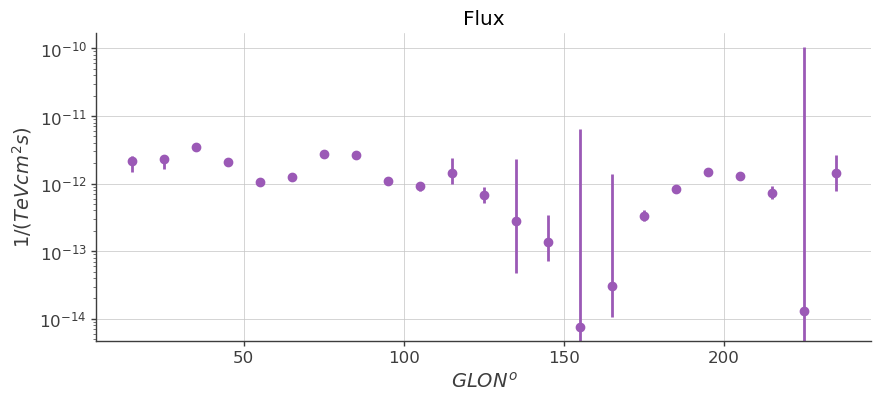

In [115]:
plt.figure(figsize=(10,4))
plt.errorbar(gc, np.array(dk)*1e9, [np.array(den)*1e9, np.array(dep)*1e9], fmt="o")
plt.yscale("log")
plt.title("Flux")
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")

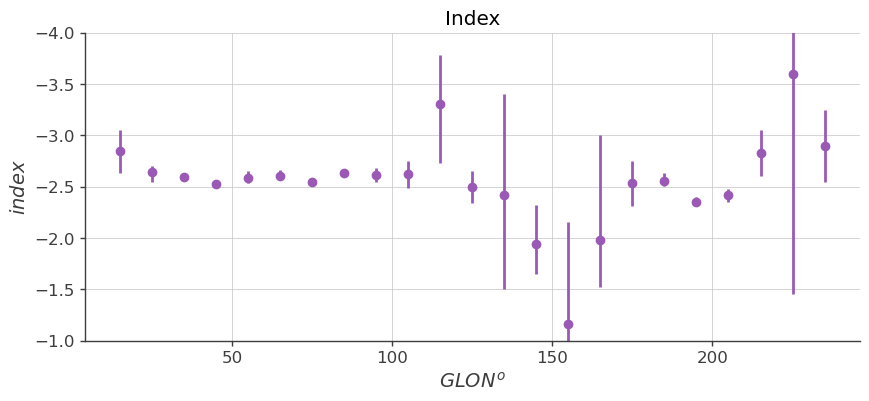

In [112]:
plt.figure(figsize=(10,4))
plt.errorbar(gc, di, [die, diep], fmt="o")
plt.ylim(-1,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()